In [ ]:
!pip install -q numpy==1.26.4 ml-dtypes==0.2.0 tensorflow==2.15.0
!pip uninstall -y numpy pandas
!pip install numpy==1.26.4 pandas==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.15.0 which is incompatible.
ydf

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install opendatasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/adityajn105/flickr8k")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aninditagarai
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k


100%|██████████| 1.04G/1.04G [00:08<00:00, 131MB/s] 


Import Modules

In [ ]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from tensorflow.keras.layers import GRU

Now we must set the directories to use the data

In [ ]:
BASE_DIR = '/content/flickr8k'
WORKING_DIR = '/content/working'

Extract Image Features

In [ ]:
!pip install torch torchvision torchaudio torch-geometric scikit-image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from skimage.segmentation import slic
from skimage.graph import rag_mean_color  # Corrected import
from skimage.io import imread
import numpy as np

# ----------------------------
# GCN Model Definition
# ----------------------------
class GCN(torch.nn.Module):
    def __init__(self, in_feats=3, hidden_feats=64, out_feats=128):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_feats, hidden_feats)
        self.conv2 = GCNConv(hidden_feats, out_feats)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# ----------------------------
# Convert image to graph
# ----------------------------
def image_to_graph(image_path, n_segments=100):
    image = imread(image_path)
    segments = slic(image, n_segments=n_segments, compactness=10)
    rag = rag_mean_color(image, segments)  # Use the directly imported function

    num_nodes = len(np.unique(segments))
    A = np.zeros((num_nodes, num_nodes))  # Adjacency
    X = np.zeros((num_nodes, 3))          # RGB mean feature

    for edge in rag.edges:
        A[edge[0], edge[1]] = 1
        A[edge[1], edge[0]] = 1

    for node in rag.nodes:
        X[node] = rag.nodes[node]['mean color']

    X = torch.tensor(X, dtype=torch.float32)
    edge_index = torch.tensor(np.array(A.nonzero()), dtype=torch.long)
    return X, edge_index

# ----------------------------
# Extract GCN Features
# ----------------------------
def extract_graph_features(image_path, gcn_model):
    gcn_model.eval()
    X, edge_index = image_to_graph(image_path)
    with torch.no_grad():
        node_features = gcn_model(X, edge_index)
    return node_features.mean(dim=0)  # Aggregate node features

In [ ]:
gcn_model = GCN(in_feats=3, hidden_feats=64, out_feats=256)  # Change out_feats as needed


In [ ]:
# NEW GNN-based feature extraction
image_path = "/content/drive/MyDrive/Flicker8k_Dataset"  # example path
features = extract_graph_features(image_path, gcn_model)  # shape: [256]


OSError: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`

In [ ]:
# 🟩 Required: For your captioning model (TensorFlow-based)
!pip install tensorflow==2.15.0
!pip install keras-preprocessing
!pip install tensorflow_addons

# 🟨 Optional: Only if you use TTS
!pip install gtts

# 🟥 REMOVE: Not needed unless you're using Vision Transformers
# !pip install --quiet vit-keras   ❌ REMOVE

# 🟩 Still required: For evaluation (BLEU, CIDEr, etc.)
!pip install "git+https://github.com/salaniz/pycocoevalcap.git"

# 🟩 NEW: Required for Graph Neural Network (GNN)
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install scikit-image  # Needed for slic(), image graph conversion


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.4
    Uninstalling typeguard-4.4.4:
      Successfully uninstalled typeguard-4.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1


  Cloning https://github.com/salaniz/pycocoevalcap.git to /tmp/pip-req-build-c1kksjc7
  Running command git clone --filter=blob:none --quiet https://github.com/salaniz/pycocoevalcap.git /tmp/pip-req-build-c1kksjc7
  Resolved https://github.com/salaniz/pycocoevalcap.git to commit a24f74c408c918f1f4ec34e9514bc8a76ce41ffd
  Preparing metadata (setup.py) ... done
  Created wheel for pycocoevalcap: filename=pycocoevalcap-1.2-py3-none-any.whl size=104312245 sha256=3882dfa93188fd70be4b3dad1fca9c446d1dca65c01efb927cbf3eb5953f532a
  Stored in directory: /tmp/pip-ephem-wheel-cache-pp4fnxx5/wheels/e5/d1/50/82763a91172a5c8058c9efff8692f3a41570e3ddd5b5b2c4b4
Successfully built pycocoevalcap


In [ ]:
# ========== IMPORTS ==========
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from skimage.segmentation import slic
from skimage.graph import rag_mean_color # Corrected import
from skimage.io import imread
import numpy as np

# ========== GCN MODEL ==========
class GCN(torch.nn.Module):
    def __init__(self, in_feats=3, hidden_feats=64, out_feats=256):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_feats, hidden_feats)
        self.conv2 = GCNConv(hidden_feats, out_feats)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

# ========== IMAGE TO GRAPH ==========
def image_to_graph(image_path, n_segments=100):
    image = imread(image_path)
    segments = slic(image, n_segments=n_segments, compactness=10)
    rag = rag_mean_color(image, segments) # Use the directly imported function

    num_nodes = len(np.unique(segments))
    A = np.zeros((num_nodes, num_nodes))  # Adjacency
    X = np.zeros((num_nodes, 3))          # RGB mean feature

    for edge in rag.edges:
        A[edge[0], edge[1]] = 1
        A[edge[1], edge[0]] = 1

    for node in rag.nodes:
        X[node] = rag.nodes[node]['mean color']

    X = torch.tensor(X, dtype=torch.float32)
    edge_index = torch.tensor(np.array(A.nonzero()), dtype=torch.long)
    return X, edge_index

# ========== EXTRACT GCN FEATURES ==========
def extract_graph_features(image_path, gcn_model):
    gcn_model.eval()
    X, edge_index = image_to_graph(image_path)
    with torch.no_grad():
        node_features = gcn_model(X, edge_index)
    graph_feature = node_features.mean(dim=0)  # [out_feats,]
    return graph_feature

In [ ]:
import os
import shutil

# Path to the directory containing all the images
image_directory = '/content/drive/MyDrive/Flicker8k_Dataset'

# Path to the file containing all the captions
caption_file = '/content/drive/MyDrive/Flickr8k_text/Flickr8k_text/captions.txt'

# Path to the text file containing the training image IDs
training_ids_file = '/content/drive/MyDrive/Flickr8k_text/Flickr8k_text/Flickr8ktrainID.txt'

# Create the output folder if it doesn't exist
output_folder = 'all_data'
os.makedirs(output_folder, exist_ok=True)

# Path to the output image folder
output_image_folder = os.path.join(output_folder, 'training_images')
os.makedirs(output_image_folder, exist_ok=True)

# Path to the output text file
output_text_file = os.path.join(output_folder, 'training_captions.txt')

# Read the training image IDs from the text file
with open(training_ids_file, 'r') as f:
    training_ids = f.read().splitlines()


TRAIN_LIMIT= 10000    #29000

training_ids = training_ids[:TRAIN_LIMIT] #for limit of train ids


# Create a dictionary to store the captions for training images
captions = {}

# Read the captions from the caption file
with open(caption_file, 'r') as f:
    for line in f:
        line = line.strip()
        if line:
            image_id, caption = line.split(',', 1)
            image_id = image_id.split('.')[0]  # Remove the file extension for comparison
            if image_id in training_ids:
                if image_id not in captions:
                    captions[image_id] = []
                captions[image_id].append(caption.strip())

# Write the image IDs and captions to the output text file
with open(output_text_file, 'w') as f:
    for image_id in training_ids:
        # Form the image filename
        image_filename = f'{image_id}.jpg'

        # Copy the image to the output image folder
        src_path = os.path.join(image_directory, image_filename)
        dst_path = os.path.join(output_image_folder, image_filename)
        if os.path.exists(src_path):
            shutil.copyfile(src_path, dst_path)
        else:
            print(f"Warning: {image_filename} does not exist in {image_directory}")

        # Write the image ID and captions to the output text file
        if image_id in captions:
            caption_list = captions[image_id]
            for caption in caption_list:
                f.write(f"{image_filename},{caption}\n")
        else:
            f.write(f"{image_filename},\n")

KeyboardInterrupt: 

In [ ]:

# Path to the directory containing all the images
image_directory = '/content/drive/MyDrive/Flicker8k_Dataset'

# Path to the file containing all the captions
caption_file = '/content/drive/MyDrive/Flickr8k_text/Flickr8k_text/captions.txt'

# Path to the text file containing the training image IDs
training_ids_file = '/content/drive/MyDrive/Flickr8k_text/Flickr8k_text/Flickr8ktrainID.txt'

# Create the output folder if it doesn't exist
output_folder = 'all_data'
os.makedirs(output_folder, exist_ok=True)

# Path to the output image folder
output_image_folder = os.path.join(output_folder, 'validation_images')
os.makedirs(output_image_folder, exist_ok=True)

# Path to the output text file
output_text_file = os.path.join(output_folder, 'validation_captions.txt')

# Read the training image IDs from the text file
with open(training_ids_file, 'r') as f:
    training_ids = f.read().splitlines()

VALID_LIMIT=1000

training_ids = training_ids[:VALID_LIMIT] #for limit of validation ids


# Create a dictionary to store the captions for training images
captions = {}

# Read the captions from the caption file
with open(caption_file, 'r') as f:
    for line in f:
        line = line.strip()
        if line:
            image_id, caption = line.split(',', 1)
            image_id = image_id.split('.')[0]  # Remove the file extension for comparison
            if image_id in training_ids:
                if image_id not in captions:
                    captions[image_id] = []
                captions[image_id].append(caption.strip())

# Write the image IDs and captions to the output text file
with open(output_text_file, 'w') as f:
    for image_id in training_ids:
        # Form the image filename
        image_filename = f'{image_id}.jpg'

        # Copy the image to the output image folder
        src_path = os.path.join(image_directory, image_filename)
        dst_path = os.path.join(output_image_folder, image_filename)
        if os.path.exists(src_path):
            shutil.copyfile(src_path, dst_path)
        else:
            print(f"Warning: {image_filename} does not exist in {image_directory}")

        # Write the image ID and captions to the output text file
        if image_id in captions:
            caption_list = captions[image_id]
            for caption in caption_list:
                f.write(f"{image_filename},{caption}\n")
        else:
            f.write(f"{image_filename},\n")


KeyboardInterrupt: 

In [ ]:
import os
import shutil

# ✅ Corrected image directory path (usually named Flickr8k_Dataset)
image_directory = '/content/drive/MyDrive/Flickr8k_Dataset'

# Caption file
caption_file = '/content/drive/MyDrive/Flickr8k_text/Flickr8k_text/captions.txt'

# Training IDs file
training_ids_file = '/content/drive/MyDrive/Flickr8k_text/Flickr8k_text/Flickr8ktrainID.txt'

# Output folders
output_folder = 'all_data'
output_image_folder = os.path.join(output_folder, 'testing_images')
output_text_file = os.path.join(output_folder, 'testing_captions.txt')

# Create folders if they don't exist
os.makedirs(output_image_folder, exist_ok=True)

# Load training image IDs
with open(training_ids_file, 'r') as f:
    training_ids = f.read().splitlines()

# ✅ Limit the number of images
TEST_LIMIT = 1000
training_ids = training_ids[:TEST_LIMIT]

# Read captions and map to image IDs
captions = {}
with open(caption_file, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if line and ',' in line:
            image_id, caption = line.split(',', 1)
            image_id = image_id.split('.')[0]  # Remove file extension
            if image_id in training_ids:
                captions.setdefault(image_id, []).append(caption.strip())

# Write to output and copy images
missing_count = 0
valid_count = 0

with open(output_text_file, 'w', encoding='utf-8') as f:
    for image_id in training_ids:
        image_filename = f'{image_id}.jpg'
        src_path = os.path.join(image_directory, image_filename)
        dst_path = os.path.join(output_image_folder, image_filename)

        if os.path.exists(src_path):
            shutil.copyfile(src_path, dst_path)
            valid_count += 1
            if image_id in captions:
                for caption in captions[image_id]:
                    f.write(f"{image_filename},{caption}\n")
            else:
                f.write(f"{image_filename},\n")
        else:
            missing_count += 1

print(f"\n✅ Completed.\n🖼️ Copied {valid_count} images.\n⚠️ Missing {missing_count} images.")



✅ Completed.
🖼️ Copied 0 images.
⚠️ Missing 1000 images.


In [ ]:
# Paths
img_patht = '/content/drive/MyDrive/Flicker8k_Dataset'
caption_file = '/content/drive/MyDrive/Flickr8k_text/Flickr8k_text/captions.txt'

# Initialize lists
all_idst = []
all_img_vectort = []
annotationst = []

# Read the captions from the caption file
with open(caption_file, 'r') as f:
    for line in f:
        line = line.strip()
        if line:
            image_idt, captiont = line.split(',', 1)
            full_flickr_image_patht = os.path.join(img_patht, image_idt)

            all_idst.append(image_idt)
            all_img_vectort.append(full_flickr_image_patht)
            annotationst.append(captiont)

# Shuffling the captions and image names together, setting a random state
#random_state = random.randint(1, 100)
#print("Random State is ", random_state)
from sklearn.utils import shuffle # Import shuffle
img_idst, all_img_vectort, annotationst = shuffle(all_idst, all_img_vectort, annotationst)

# Selecting the first 40000 captions from the shuffled set
num_examples = len(all_idst)

img_idst = img_idst[:num_examples]
all_img_vectort = all_img_vectort[:num_examples]
annotationst = annotationst[:num_examples]

# Creating a DataFrame
dftrain = pd.DataFrame(list(zip(img_idst, all_img_vectort, annotationst)), columns=['ID', 'Path', 'Caption'])
dftrain

,ID,Path,Caption
0,2107838729_a527e434bd.jpg,/content/drive/MyDrive/Flicker8k_Dataset/21078...,Little boy standing on the bank of a river .
1,3677613006_4689cb8e4e.jpg,/content/drive/MyDrive/Flicker8k_Dataset/36776...,The girl is wearing headphones and holding a M...
2,2922807898_b5a06d5c70.jpg,/content/drive/MyDrive/Flicker8k_Dataset/29228...,A dog leaps in the air to catch a disc .
3,3148811252_2fa9490a04.jpg,/content/drive/MyDrive/Flicker8k_Dataset/31488...,There is a Florida college player dribbling th...
4,3765374230_cb1bbee0cb.jpg,/content/drive/MyDrive/Flicker8k_Dataset/37653...,"""A girl in a swimsuit stands in the spray of w..."
...,...,...,...
40451,2480664591_e6d22ed61c.jpg,/content/drive/MyDrive/Flicker8k_Dataset/24806...,Two people are rowing a canoe through the water .
40452,2101808682_0d66ef4a08.jpg,/content/drive/MyDrive/Flicker8k_Dataset/21018...,There are birds on the boy
40453,3383545083_1d7c95b003.jpg,/content/drive/MyDrive/Flicker8k_Dataset/33835...,The dog is biting a stick .
40454,3286222970_1fa445e38f.jpg,/content/drive/MyDrive/Flicker8k_Dataset/32862...,A young girl walks quickly outside .


In [ ]:
# Paths
img_pathv = '/content/drive/MyDrive/Flicker8k_Dataset'
caption_file = '/content/drive/MyDrive/Flickr8k_text/Flickr8k_text/captions.txt'

# Initialize lists
all_idsv = []
all_img_vectorv = []
annotationsv = []

# Read the captions from the caption file
with open(caption_file, 'r') as f:
    for line in f:
        line = line.strip()
        if line:
            image_idv, captionv = line.split(',', 1)
            full_flickr_image_pathv = os.path.join(img_pathv, image_idv)

            all_idsv.append(image_idv)
            all_img_vectorv.append(full_flickr_image_pathv)
            annotationsv.append(captionv)

# Shuffling the captions and image names together, setting a random state
#random_state = random.randint(1, 100)
#print("Random State is ", random_state)
img_idsv, all_img_vectorv, annotationsv = shuffle(all_idsv, all_img_vectorv, annotationsv)

# Selecting the first 40000 captions from the shuffled set
num_examples = len(all_idsv)

img_idsv = img_idsv[:num_examples]
all_img_vectorv = all_img_vectorv[:num_examples]
annotationsv = annotationsv[:num_examples]

# Creating a DataFrame
dfval = pd.DataFrame(list(zip(img_idsv, all_img_vectorv, annotationsv)), columns=['ID', 'Path', 'Caption'])
dfval


,ID,Path,Caption
0,2303426046_09cfd7bc4e.jpg,/content/drive/MyDrive/Flicker8k_Dataset/23034...,Large brown dog jumping over a bush in a grass...
1,2752331711_cb18abba5a.jpg,/content/drive/MyDrive/Flicker8k_Dataset/27523...,A man sits in a camping chair near the edge of...
2,3433470650_a8b1c27173.jpg,/content/drive/MyDrive/Flicker8k_Dataset/34334...,A group of men walk on a street with yellow ri...
3,1089755335_0bfbfd30e6.jpg,/content/drive/MyDrive/Flicker8k_Dataset/10897...,A woman stands with children on a boardwalk at...
4,3403370354_5d266873b4.jpg,/content/drive/MyDrive/Flicker8k_Dataset/34033...,A man with a canned drink is standing under a ...
...,...,...,...
40451,3454621502_73af6742fb.jpg,/content/drive/MyDrive/Flicker8k_Dataset/34546...,A dog leaps on the sandy beach .
40452,2883099128_0b056eed9e.jpg,/content/drive/MyDrive/Flicker8k_Dataset/28830...,A shirtless man playing tennis in an fenced-in...
40453,3591462960_86045906bd.jpg,/content/drive/MyDrive/Flicker8k_Dataset/35914...,A rodeo rider gets tossed up into the air by a...
40454,3411579899_0f8ed09142.jpg,/content/drive/MyDrive/Flicker8k_Dataset/34115...,A kid with a white shirt and helmet riding a b...


In [ ]:
# Paths
img_pathtst = '/content/drive/MyDrive/Flicker8k_Dataset'
caption_file = '/content/drive/MyDrive/Flickr8k_text/Flickr8k_text/captions.txt'

# Initialize lists
all_idstst = []
all_img_vectortst = []
annotationstst = []

# Read the captions from the caption file
with open(caption_file, 'r') as f:
    for line in f:
        line = line.strip()
        if line:
            image_idtst, captiontst = line.split(',', 1)
            full_flickr_image_pathtst = os.path.join(img_pathtst, image_idtst)

            all_idstst.append(image_idtst)
            all_img_vectortst.append(full_flickr_image_pathtst)
            annotationstst.append(captiontst)

# Shuffling the captions and image names together, setting a random state
import random # Import random
from sklearn.utils import shuffle
random_state = random.randint(1, 100)
print("Random State is ", random_state)
img_idstst, all_img_vectortst, annotationstst = shuffle(all_idstst, all_img_vectortst, annotationstst, random_state=random_state)

# Selecting the first 40000 captions from the shuffled set
num_examples = len(all_idstst)

img_idstst = img_idstst[:num_examples]
all_img_vectortst = all_img_vectortst[:num_examples]
annotationstst = annotationstst[:num_examples]

# Creating a DataFrame
dftrain = pd.DataFrame(list(zip(img_idstst, all_img_vectortst, annotationstst)), columns=['ID', 'Path', 'Caption'])
print(dftrain)

Random State is  64
                              ID  \
0        72964268_d532bb8ec7.jpg   
1      2867968184_908d87cf2c.jpg   
2      3460551728_63255cec18.jpg   
3      2860667542_95abec3380.jpg   
4      2676764246_c58205a365.jpg   
...                          ...   
40451  2893476169_f38dd32051.jpg   
40452   413231421_43833a11f5.jpg   
40453  3214237686_6566b8b52f.jpg   
40454  3164415865_612f9fd8bc.jpg   
40455   733964952_69f011a6c4.jpg   

                                                    Path  \
0      /content/drive/MyDrive/Flicker8k_Dataset/72964...   
1      /content/drive/MyDrive/Flicker8k_Dataset/28679...   
2      /content/drive/MyDrive/Flicker8k_Dataset/34605...   
3      /content/drive/MyDrive/Flicker8k_Dataset/28606...   
4      /content/drive/MyDrive/Flicker8k_Dataset/26767...   
...                                                  ...   
40451  /content/drive/MyDrive/Flicker8k_Dataset/28934...   
40452  /content/drive/MyDrive/Flicker8k_Dataset/41323...   
40453  

In [ ]:
print(len(all_img_vectort))
print(len(all_img_vectorv))
#print(len(all_img_vectortst))


40456
40456


In [ ]:
print(len(annotationst))
print(len(annotationsv))
#print(len(annotationstst))

40456
40456


Now we extract the image features and load the data for preprocess

In [ ]:
import os
import pickle
import torch
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor
from functools import partial

# Ensure GCN model is on correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gcn_model.to(device)
gcn_model.eval()

features = {}
directory = os.path.join(BASE_DIR, 'Images')

def process_image(img_name, gcn_model, directory):
    if not img_name.lower().endswith('.jpg'):
        return None, None

    img_path = os.path.join(directory, img_name)

    try:
        # Extract features using your GCN-based method
        feature_tensor = extract_graph_features(img_path, gcn_model)

        # Handle variable shapes (e.g., if using superpixels/graph nodes)
        if feature_tensor.ndim == 2 and feature_tensor.shape[1] < 100:
            print(f"⚠️ Skipping {img_name}: too few feature dimensions {feature_tensor.shape}")
            return None, None

        # Convert to numpy safely
        feature_array = feature_tensor.cpu().numpy()

        # Extract image ID from filename
        image_id = img_name.rsplit('.', 1)[0]

        return image_id, feature_array

    except (IndexError, ValueError) as e:
        print(f"⚠️ Shape error in {img_name}: {e}")
        return None, None
    except Exception as e:
        print(f"⚠️ Other error in {img_name}: {e}")
        return None, None

# Run in parallel using threads for faster I/O
with ThreadPoolExecutor(max_workers=8) as executor:
    for image_id, feature_array in tqdm(
        executor.map(partial(process_image, gcn_model=gcn_model, directory=directory), os.listdir(directory))
    ):
        if image_id is not None:
            features[image_id] = feature_array

# Optional: save the features
# with open('gcn_features.pkl', 'wb') as f:
#     pickle.dump(features, f)


0it [00:00, ?it/s]

⚠️ Shape error in 2873188959_ff023defa9.jpg: index 82 is out of bounds for axis 1 with size 82
⚠️ Shape error in 252578659_9e404b6430.jpg: index 63 is out of bounds for axis 1 with size 63
⚠️ Shape error in 1446933195_8fe9725d62.jpg: index 43 is out of bounds for axis 1 with size 43
⚠️ Shape error in 460195978_fc522a4979.jpg: index 74 is out of bounds for axis 1 with size 74


4it [00:19,  3.74s/it]

⚠️ Shape error in 3537218226_478d2e4f26.jpg: index 61 is out of bounds for axis 1 with size 61
⚠️ Shape error in 3712742641_641282803e.jpg: index 81 is out of bounds for axis 1 with size 81
⚠️ Shape error in 2598012140_832863fcb9.jpg: index 88 is out of bounds for axis 1 with size 88


7it [00:23,  2.39s/it]

⚠️ Shape error in 3090600019_8808fe7a9d.jpg: index 83 is out of bounds for axis 1 with size 83
⚠️ Shape error in 2920969723_83918fe909.jpg: index 51 is out of bounds for axis 1 with size 51


11it [00:34,  2.37s/it]

⚠️ Shape error in 3687062281_e62f70baf3.jpg: index 71 is out of bounds for axis 1 with size 71
⚠️ Shape error in 512163695_51a108761d.jpg: index 54 is out of bounds for axis 1 with size 54
⚠️ Shape error in 3033668641_5905f73990.jpg: index 69 is out of bounds for axis 1 with size 69
⚠️ Shape error in 56494233_1824005879.jpg: index 85 is out of bounds for axis 1 with size 85
⚠️ Shape error in 2567035103_3511020c8f.jpg: index 43 is out of bounds for axis 1 with size 43


13it [00:39,  2.31s/it]

⚠️ Shape error in 2393911878_68afe6e6c1.jpg: index 93 is out of bounds for axis 1 with size 93


16it [00:41,  1.75s/it]

⚠️ Shape error in 3702607829_2b8b3e65ab.jpg: index 74 is out of bounds for axis 1 with size 74


17it [00:49,  2.71s/it]

⚠️ Shape error in 2756636539_cc1eacbf4a.jpg: index 27 is out of bounds for axis 1 with size 27
⚠️ Shape error in 3487419819_e3f89444ce.jpg: index 42 is out of bounds for axis 1 with size 42


18it [00:51,  2.50s/it]

⚠️ Shape error in 3465000218_c94e54e208.jpg: index 60 is out of bounds for axis 1 with size 60


20it [00:54,  2.28s/it]

⚠️ Shape error in 498492764_fe276e505a.jpg: index 68 is out of bounds for axis 1 with size 68


21it [00:56,  2.18s/it]

⚠️ Shape error in 486720042_b785e7f88c.jpg: index 85 is out of bounds for axis 1 with size 85
⚠️ Shape error in 2052953131_30834196fb.jpg: index 105 is out of bounds for axis 1 with size 105


22it [00:58,  2.18s/it]

⚠️ Shape error in 2234702530_a265a4df22.jpg: index 82 is out of bounds for axis 1 with size 82


24it [01:00,  1.64s/it]

⚠️ Shape error in 3154152744_4e93ec8a62.jpg: index 74 is out of bounds for axis 1 with size 74


24it [01:01,  2.56s/it]


⚠️ Shape error in 3399843227_3b9d2a8dbf.jpg: index 58 is out of bounds for axis 1 with size 58
⚠️ Shape error in 3726730085_2468ee9220.jpg: index 87 is out of bounds for axis 1 with size 87


KeyboardInterrupt: 

Store features in pickle

In [ ]:
with open('gcn_features.pkl', 'wb') as f:
    pickle.dump(features, f)

print("✅ All GCN features extracted and saved.")


✅ All GCN features extracted and saved.


In [ ]:
import os

# Create the working directory if it doesn't exist
os.makedirs(WORKING_DIR, exist_ok=True)

# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

Load features from pickle

In [ ]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

Load the Captions Data

In [ ]:
from tqdm import tqdm
import os

with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    captions_doc = f.read()

# create mapping of image to captions
mapping = {}

# process lines
for line in tqdm(captions_doc.strip().split('\n')):
    tokens = line.split(',')
    if len(tokens) < 2:
        continue

    image_id, caption = tokens[0], tokens[1:]
    image_id = image_id.split('.')[0]  # remove .jpg extension
    caption = " ".join(caption).strip()

    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)


100%|██████████| 40456/40456 [00:00<00:00, 622563.87it/s]


Now let us see the no. of images loaded

In [ ]:
len(mapping)

8092

Preprocess Text Data

In [ ]:
import re

def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            caption = captions[i]

            # convert to lowercase
            caption = caption.lower()

            # remove digits and special characters using regex
            caption = re.sub(r'[^a-z\s]', '', caption)

            # remove extra spaces
            caption = re.sub(r'\s+', ' ', caption).strip()

            # remove short words (like 'a', 'i') and add start/end tags
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word) > 1]) + ' endseq'

            captions[i] = caption


Let us visualize the text before and after cleaning

In [ ]:
# before preprocess of text
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

Preprocess the text

In [ ]:
# preprocess the text
clean(mapping)

After preprocess of text

In [ ]:
# after preprocess of text
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

Next we will store the preprocessed captions into a list

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)
len(all_captions) # no. of unique captions stored

40456

Let us see the first ten captions

In [ ]:
all_captions[:10]

['startseq caption endseq',
 'startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tricolored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq']

Now we start processing the text data

In [ ]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size # no of unique words

8769

In [ ]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

34

Train Test Split

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

Now we will define a batch and include the padding sequence

In [ ]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = [], [], []
    n = 0
    while True:
        for key in data_keys:
            captions = mapping[key]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length, padding='post')[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    X1.append(features[key])  # Or features[key][0] if needed
                    X2.append(in_seq)
                    y.append(out_seq)
            n += 1
            if n == batch_size:
                yield {"image": np.array(X1), "text": np.array(X2)}, np.array(y)
                X1, X2, y = [], [], []
                n = 0


Model Creation

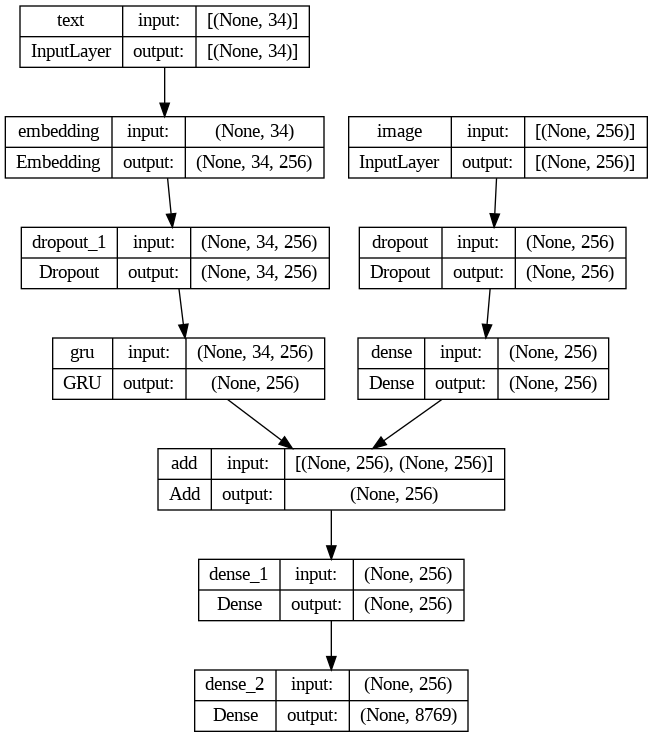

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, GRU, add
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# GCN-based image feature input
inputs1 = Input(shape=(256,), name="image")  # ✅ changed from 4096 to 256
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

# Text sequence input
inputs2 = Input(shape=(max_length,), name="text")
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = GRU(256)(se2)

# Decoder merges image + text features
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

# Define and compile the model
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Plot model architecture
plot_model(model, show_shapes=True)


Now let us train the model

In [ ]:
!pip install pycocoevalcap
!pip install multiprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 4.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once



Epoch 1/20
225/225 [==============================] - 51s 188ms/step - loss: 6.2799
Validation Loss: 5.8600

Epoch 2/20
225/225 [==============================] - 38s 168ms/step - loss: 5.1116
Validation Loss: 5.6466

Epoch 3/20
225/225 [==============================] - 38s 170ms/step - loss: 4.7438
Validation Loss: 5.7167

Epoch 4/20
225/225 [==============================] - 36s 162ms/step - loss: 4.2764
Validation Loss: 5.7225

Epoch 5/20
225/225 [==============================] - 36s 161ms/step - loss: 3.9065
Validation Loss: 6.9857
Generating captions for evaluation...


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
tokenization...
setting up scorers...
Progress: 384.5M / 384.5M (100.0%)
Extracting stanford-corenlp-3.6.0 ...
Done.
computing Bleu score...
{'testlen': 582, 'reflen': 481, 'guess': [582, 532, 482, 432], 'correct': [169, 32, 3, 0]}
ratio: 1.2099792099766944
Bleu_1: 0.290
Bleu_2: 0.132
Bleu_3: 0.048
Bleu_4: 0.000
computing METEOR score...
METEOR: 0.119
computing Rouge score...
ROUGE_L: 0.282
computing CIDEr score...
CIDEr: 0.097
computing SPICE score...
SPICE: 0.050
Scores @ Epoch 5:
  Bleu_1: 0.2904
  Bleu_2: 0.1322
  Bleu_3: 0.0477
  Bleu_4: 0.0000
  METEOR: 0.1194
  ROUGE_L: 0.2819
  CIDEr: 0.0974
  SPICE: 0.0504

Epoch 6/20
225/225 [==============================] - 36s 159ms/step - loss: 3.5700
Validation Loss: 6.2415

Epoch 7/20
225/225 [==============================] - 36s 159ms/step - loss: 3.3660
Validation Loss: 7.

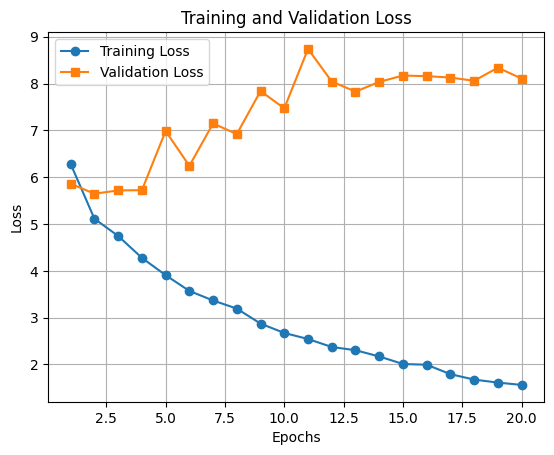

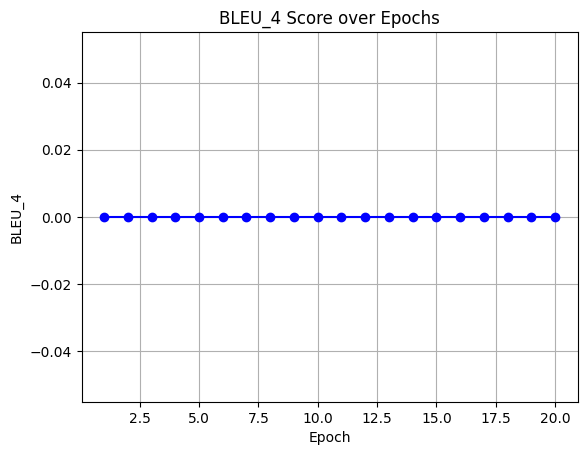

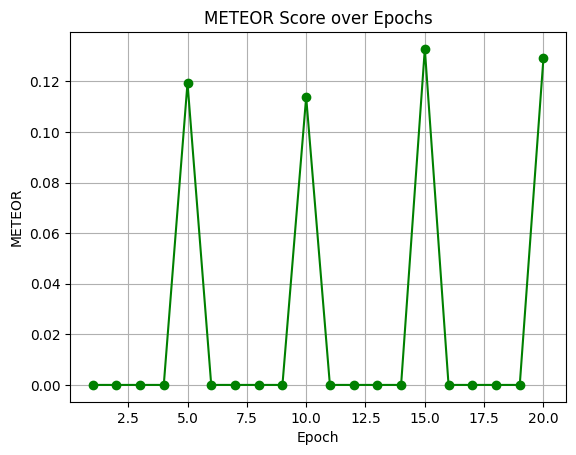

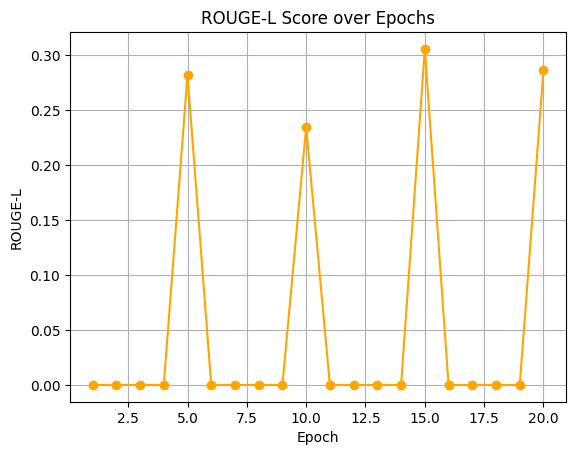

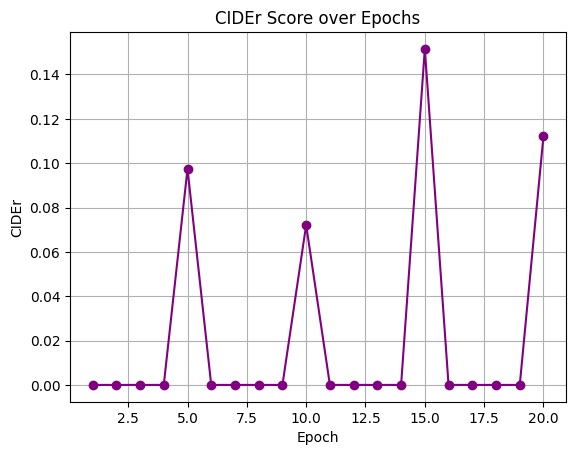

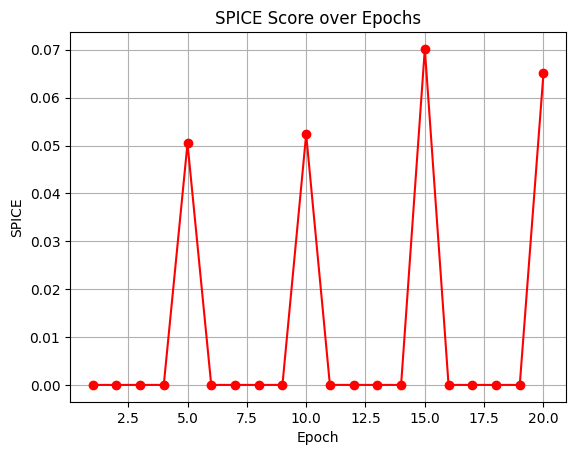

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import gc
import tensorflow as tf
from tensorflow.keras import mixed_precision
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pycocoevalcap.eval import COCOEvalCap
from pycocotools.coco import COCO
from multiprocessing.pool import ThreadPool
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical

# Set mixed precision
mixed_precision.set_global_policy('mixed_float16')

# Training params
epochs = 20
batch_size = 32

# Split data
split = int(len(image_ids) * 0.90)
train_ids, test_ids = image_ids[:split], image_ids[split:]
val_ids = train_ids[:50]
train_ids = train_ids[50:]

steps = len(train_ids) // batch_size
val_steps = len(val_ids) // batch_size

train_loss_plot, val_loss_plot = [], []
bleu_scores, meteor_scores, rouge_scores, cider_scores, spice_scores = [], [], [], [], []

# Word index cache
from functools import lru_cache

@lru_cache(maxsize=2048)
def idx_to_word(integer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

@tf.function(reduce_retracing=True)
def wrapped_predict(model, image, sequence):
    return model([image, sequence], training=False)

def predict_caption(model, image, tokenizer, model_max_length):
    in_text = 'startseq'
    for _ in range(model_max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=model_max_length, padding='post')[0]
        yhat = wrapped_predict(model, tf.convert_to_tensor([image]), tf.convert_to_tensor([sequence]))
        yhat = tf.argmax(yhat[0]).numpy()
        word = idx_to_word(yhat)
        if word is None or word == 'endseq':
            break
        in_text += ' ' + word
    return in_text

def tf_data_generator(image_ids, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    def gen():
        for img_id in image_ids:
            image = features[img_id]  # ✅ GCN feature (256,)
            captions = mapping[img_id]
            for caption in captions:
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1, len(seq)):
                    in_seq, out_seq = seq[:i], seq[i]
                    in_seq = pad_sequences([in_seq], maxlen=max_length, padding='post')[0]
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    yield (image, in_seq), out_seq

    output_signature = (
        (tf.TensorSpec(shape=(256,), dtype=tf.float32),    # ✅ GCN feature shape
         tf.TensorSpec(shape=(max_length,), dtype=tf.int32)),
        tf.TensorSpec(shape=(vocab_size,), dtype=tf.float32)
    )

    return tf.data.Dataset.from_generator(gen, output_signature=output_signature)\
             .batch(batch_size).prefetch(tf.data.AUTOTUNE)

def generate_for_image(img_id):
    if img_id not in features:
        return None
    image_feature = features[img_id]
    if len(image_feature.shape) == 2:
        image_feature = image_feature[0]
    caption = predict_caption(model, image_feature, tokenizer, max_length)
    return (img_id, caption)

def generate_captions_parallel(val_ids, num_threads=8):
    with ThreadPool(num_threads) as pool:
        results = pool.map(generate_for_image, val_ids)
    return [r for r in results if r]

def evaluate_captions(references, predictions):
    gts_path, res_path = "gts.json", "res.json"

    with open(gts_path, "w") as f:
        gts_list = []
        ann_id_counter = 0
        for img_id, caps in references.items():
            for cap_dict in caps:
                gts_list.append({"image_id": img_id, "caption": cap_dict["caption"], "id": ann_id_counter})
                ann_id_counter += 1
        json.dump(gts_list, f)

    with open(res_path, "w") as f:
        res_list = [{"image_id": img_id, "caption": caps[0]["caption"]} for img_id, caps in predictions.items() if caps]
        json.dump(res_list, f)

    dummy_images = [{"id": img_id} for img_id in predictions.keys()]
    gts_data_filtered = [ann for ann in gts_list if ann['image_id'] in predictions]

    coco_gt_format = {"info": {}, "annotations": gts_data_filtered, "images": dummy_images}
    coco_gt_path_formatted = "gts_formatted.json"
    with open(coco_gt_path_formatted, 'w') as f:
        json.dump(coco_gt_format, f)

    if dummy_images:
        coco = COCO(coco_gt_path_formatted)
        cocoRes = coco.loadRes(res_path)
        cocoEval = COCOEvalCap(coco, cocoRes)
        cocoEval.params['image_id'] = cocoRes.getImgIds()
        cocoEval.evaluate()

        os.remove(gts_path)
        os.remove(res_path)
        os.remove(coco_gt_path_formatted)

        return cocoEval.eval
    else:
        return {k: 0 for k in ['BLEU_1', 'BLEU_2', 'BLEU_3', 'BLEU_4', 'METEOR', 'ROUGE_L', 'CIDEr', 'SPICE']}

# 🔁 TRAINING LOOP
for i in range(epochs):
    print(f"\nEpoch {i+1}/{epochs}")
    train_dataset = tf_data_generator(train_ids, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    history = model.fit(train_dataset, epochs=1, steps_per_epoch=steps, verbose=1)
    train_loss_plot.append(history.history['loss'][0])

    if val_steps > 0:
        val_dataset = tf_data_generator(val_ids, mapping, features, tokenizer, max_length, vocab_size, batch_size)
        val_loss = model.evaluate(val_dataset.take(val_steps), verbose=0)
        val_loss_plot.append(val_loss)
        print(f"Validation Loss: {val_loss:.4f}")
    else:
        print("Validation set too small.")
        val_loss_plot.append(None)

    if (i + 1) % 5 == 0:
        print("Generating captions for evaluation...")
        results = generate_captions_parallel(val_ids)
        predictions, references = {}, {}
        for img_id, caption in results:
            predictions[img_id] = [{"caption": caption}]
            if img_id in mapping:
                references[img_id] = [{"caption": cap} for cap in mapping[img_id]]

        scores = evaluate_captions(references, predictions)
        bleu_scores.append(scores.get('BLEU_4', 0))
        meteor_scores.append(scores.get('METEOR', 0))
        rouge_scores.append(scores.get('ROUGE_L', 0))
        cider_scores.append(scores.get('CIDEr', 0))
        spice_scores.append(scores.get('SPICE', 0))

        print(f"Scores @ Epoch {i+1}:")
        for metric, score in scores.items():
            print(f"  {metric}: {score:.4f}")
    else:
        bleu_scores.append(0)
        meteor_scores.append(0)
        rouge_scores.append(0)
        cider_scores.append(0)
        spice_scores.append(0)

    gc.collect()

# 📈 Plot Loss
plt.figure()
plt.plot(range(1, epochs + 1), train_loss_plot, label='Training Loss', marker='o')
if all(v is not None for v in val_loss_plot):
    plt.plot(range(1, epochs + 1), val_loss_plot, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# 📊 Plot Evaluation Metrics
metrics = [(bleu_scores, 'BLEU_4', 'blue'), (meteor_scores, 'METEOR', 'green'),
           (rouge_scores, 'ROUGE-L', 'orange'), (cider_scores, 'CIDEr', 'purple'),
           (spice_scores, 'SPICE', 'red')]

for scores, label, color in metrics:
    if scores:
        plt.figure()
        plt.plot(range(1, epochs + 1), scores, marker='o', color=color)
        plt.title(f'{label} Score over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel(label)
        plt.grid(True)
        plt.show()


You can save the model in the working directory for reuse

In [ ]:
model.save(os.path.join(WORKING_DIR, 'best_model.h5'))


Generate Captions for the Image

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
         return word
    return None

Convert the predicted index from the model into a word

In [ ]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'

    for _ in range(max_length):
        # Convert the text to sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]

        # Pad the sequence
        sequence = pad_sequences([sequence], maxlen=max_length, padding='post')

        # Predict the next word
        yhat = model.predict([image, sequence], verbose=0)

        # Choose the word with highest probability
        yhat = np.argmax(yhat[0])

        # Map predicted index to word
        word = idx_to_word(yhat, tokenizer)

        # If word not found, stop
        if word is None:
            break

        # Append word for the next prediction
        in_text += ' ' + word

        # Stop if end token found
        if word == 'endseq':
            break

    return in_text


Now we validate the data using BLEU Score

In [ ]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'

    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length, padding='post')

        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat[0])  # Predict next word index

        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break

        in_text += ' ' + word
        if word == 'endseq':
            break

    return in_text


  0%|          | 1/810 [00:03<43:24,  3.22s/it]

BLEU-1: 0.055556
BLEU-2: 0.039841


  0%|          | 2/810 [00:03<22:36,  1.68s/it]

BLEU-1: 0.106383
BLEU-2: 0.048622


  0%|          | 3/810 [00:04<15:42,  1.17s/it]

BLEU-1: 0.157895
BLEU-2: 0.054074


  0%|          | 4/810 [00:05<14:10,  1.06s/it]

BLEU-1: 0.191781
BLEU-2: 0.052720


  1%|          | 5/810 [00:05<11:32,  1.16it/s]

BLEU-1: 0.231707
BLEU-2: 0.054856


  1%|          | 6/810 [00:06<10:35,  1.27it/s]

BLEU-1: 0.265957
BLEU-2: 0.095219


  1%|          | 7/810 [00:07<09:46,  1.37it/s]

BLEU-1: 0.295238
BLEU-2: 0.122732


  1%|          | 8/810 [00:08<11:28,  1.17it/s]

BLEU-1: 0.292683
BLEU-2: 0.112807


  1%|          | 9/810 [00:09<14:29,  1.09s/it]

BLEU-1: 0.279720
BLEU-2: 0.102163


  1%|          | 10/810 [00:12<20:18,  1.52s/it]

BLEU-1: 0.245810
BLEU-2: 0.100903


  1%|▏         | 11/810 [00:12<15:43,  1.18s/it]

BLEU-1: 0.256684
BLEU-2: 0.101040


  1%|▏         | 12/810 [00:13<12:59,  1.02it/s]

BLEU-1: 0.280612
BLEU-2: 0.123494


  2%|▏         | 13/810 [00:13<11:01,  1.20it/s]

BLEU-1: 0.287805
BLEU-2: 0.122433


  2%|▏         | 14/810 [00:14<10:04,  1.32it/s]

BLEU-1: 0.291667
BLEU-2: 0.120162


  2%|▏         | 15/810 [00:14<08:38,  1.53it/s]

BLEU-1: 0.308036
BLEU-2: 0.132990


  2%|▏         | 16/810 [00:15<08:25,  1.57it/s]

BLEU-1: 0.310638
BLEU-2: 0.130466


  2%|▏         | 17/810 [00:15<07:32,  1.75it/s]

BLEU-1: 0.325103
BLEU-2: 0.141912


  2%|▏         | 18/810 [00:16<08:19,  1.59it/s]

BLEU-1: 0.326848
BLEU-2: 0.147922


  2%|▏         | 19/810 [00:17<08:04,  1.63it/s]

BLEU-1: 0.329588
BLEU-2: 0.145821


  2%|▏         | 20/810 [00:19<14:01,  1.07s/it]

BLEU-1: 0.300330
BLEU-2: 0.134317


  3%|▎         | 21/810 [00:19<12:32,  1.05it/s]

BLEU-1: 0.313291
BLEU-2: 0.138261


  3%|▎         | 22/810 [00:20<11:40,  1.13it/s]

BLEU-1: 0.322188
BLEU-2: 0.141209


  3%|▎         | 23/810 [00:21<10:38,  1.23it/s]

BLEU-1: 0.332353
BLEU-2: 0.151873


  3%|▎         | 24/810 [00:21<10:30,  1.25it/s]

BLEU-1: 0.337143
BLEU-2: 0.154228


  3%|▎         | 25/810 [00:22<10:27,  1.25it/s]

BLEU-1: 0.344444
BLEU-2: 0.163502


  3%|▎         | 26/810 [00:23<09:40,  1.35it/s]

BLEU-1: 0.347826
BLEU-2: 0.162613


  3%|▎         | 27/810 [00:24<10:29,  1.24it/s]

BLEU-1: 0.348285
BLEU-2: 0.160392


  3%|▎         | 28/810 [00:25<10:40,  1.22it/s]

BLEU-1: 0.356234
BLEU-2: 0.173941


  4%|▎         | 29/810 [00:25<10:09,  1.28it/s]

BLEU-1: 0.355556
BLEU-2: 0.171215


  4%|▎         | 30/810 [00:26<09:58,  1.30it/s]

BLEU-1: 0.368421
BLEU-2: 0.179678


  4%|▍         | 31/810 [00:27<09:46,  1.33it/s]

BLEU-1: 0.366589
BLEU-2: 0.181640


  4%|▍         | 32/810 [00:29<14:53,  1.15s/it]

BLEU-1: 0.349036
BLEU-2: 0.169958


  4%|▍         | 33/810 [00:29<12:05,  1.07it/s]

BLEU-1: 0.351579
BLEU-2: 0.169220


  4%|▍         | 34/810 [00:31<13:54,  1.08s/it]

BLEU-1: 0.348000
BLEU-2: 0.166225


  4%|▍         | 35/810 [00:31<11:06,  1.16it/s]

BLEU-1: 0.349112
BLEU-2: 0.165429


  4%|▍         | 36/810 [00:33<15:51,  1.23s/it]

BLEU-1: 0.333333
BLEU-2: 0.155968


  5%|▍         | 37/810 [00:34<12:57,  1.01s/it]

BLEU-1: 0.338768
BLEU-2: 0.162210


  5%|▍         | 38/810 [00:34<12:04,  1.07it/s]

BLEU-1: 0.344583
BLEU-2: 0.167997


  5%|▍         | 39/810 [00:35<12:05,  1.06it/s]

BLEU-1: 0.347826
BLEU-2: 0.168976


  5%|▍         | 40/810 [00:36<11:03,  1.16it/s]

BLEU-1: 0.352740
BLEU-2: 0.174573


  5%|▌         | 41/810 [00:37<11:18,  1.13it/s]

BLEU-1: 0.354622
BLEU-2: 0.175287


  5%|▌         | 42/810 [00:38<10:17,  1.24it/s]

BLEU-1: 0.363636
BLEU-2: 0.185019


  5%|▌         | 43/810 [00:38<09:41,  1.32it/s]

BLEU-1: 0.366288
BLEU-2: 0.187343


  5%|▌         | 44/810 [00:39<08:53,  1.43it/s]

BLEU-1: 0.366826
BLEU-2: 0.186028


  6%|▌         | 45/810 [00:41<14:06,  1.11s/it]

BLEU-1: 0.352941
BLEU-2: 0.178834


  6%|▌         | 46/810 [00:41<11:55,  1.07it/s]

BLEU-1: 0.355126
BLEU-2: 0.178095


  6%|▌         | 47/810 [00:42<10:01,  1.27it/s]

BLEU-1: 0.355360
BLEU-2: 0.177167


  6%|▌         | 48/810 [00:42<09:17,  1.37it/s]

BLEU-1: 0.354046
BLEU-2: 0.175461


  6%|▌         | 49/810 [00:43<09:16,  1.37it/s]

BLEU-1: 0.354610
BLEU-2: 0.175534


  6%|▌         | 50/810 [00:44<10:23,  1.22it/s]

BLEU-1: 0.351314
BLEU-2: 0.172495


  6%|▋         | 51/810 [00:45<09:34,  1.32it/s]

BLEU-1: 0.355586
BLEU-2: 0.175262


  6%|▋         | 52/810 [00:47<14:34,  1.15s/it]

BLEU-1: 0.341558
BLEU-2: 0.167531


  7%|▋         | 53/810 [00:48<15:05,  1.20s/it]

BLEU-1: 0.343075
BLEU-2: 0.167464


  7%|▋         | 54/810 [00:51<20:58,  1.66s/it]

BLEU-1: 0.335358
BLEU-2: 0.164432


  7%|▋         | 55/810 [00:51<16:18,  1.30s/it]

BLEU-1: 0.335740
BLEU-2: 0.163782


  7%|▋         | 56/810 [00:52<13:42,  1.09s/it]

BLEU-1: 0.338480
BLEU-2: 0.168588


  7%|▋         | 57/810 [00:53<11:58,  1.05it/s]

BLEU-1: 0.341149
BLEU-2: 0.170714


  7%|▋         | 58/810 [00:53<10:44,  1.17it/s]

BLEU-1: 0.341435
BLEU-2: 0.170967


  7%|▋         | 59/810 [00:54<10:32,  1.19it/s]

BLEU-1: 0.346241
BLEU-2: 0.174467


  7%|▋         | 60/810 [00:56<15:25,  1.23s/it]

BLEU-1: 0.334792
BLEU-2: 0.168006


  8%|▊         | 61/810 [00:57<13:58,  1.12s/it]

BLEU-1: 0.335845
BLEU-2: 0.168063


  8%|▊         | 62/810 [00:59<17:25,  1.40s/it]

BLEU-1: 0.326425
BLEU-2: 0.162446


  8%|▊         | 63/810 [01:00<14:40,  1.18s/it]

BLEU-1: 0.330604
BLEU-2: 0.165801


  8%|▊         | 64/810 [01:00<12:31,  1.01s/it]

BLEU-1: 0.329960
BLEU-2: 0.164741


  8%|▊         | 65/810 [01:01<12:40,  1.02s/it]

BLEU-1: 0.333666
BLEU-2: 0.167815


  8%|▊         | 66/810 [01:05<21:05,  1.70s/it]

BLEU-1: 0.324976
BLEU-2: 0.162603


  8%|▊         | 67/810 [01:05<16:30,  1.33s/it]

BLEU-1: 0.327273
BLEU-2: 0.163618


  8%|▊         | 68/810 [01:06<13:28,  1.09s/it]

BLEU-1: 0.328273
BLEU-2: 0.164218


  9%|▊         | 69/810 [01:06<11:41,  1.06it/s]

BLEU-1: 0.331455
BLEU-2: 0.168187


  9%|▊         | 70/810 [01:07<11:41,  1.05it/s]

BLEU-1: 0.332100
BLEU-2: 0.170983


  9%|▉         | 71/810 [01:09<16:05,  1.31s/it]

BLEU-1: 0.324978
BLEU-2: 0.167218


  9%|▉         | 72/810 [01:10<13:49,  1.12s/it]

BLEU-1: 0.327724
BLEU-2: 0.169808


  9%|▉         | 73/810 [01:11<13:17,  1.08s/it]

BLEU-1: 0.330716
BLEU-2: 0.171115


  9%|▉         | 74/810 [01:12<11:08,  1.10it/s]

BLEU-1: 0.332468
BLEU-2: 0.171829


  9%|▉         | 75/810 [01:14<15:35,  1.27s/it]

BLEU-1: 0.324937
BLEU-2: 0.168056


  9%|▉         | 76/810 [01:15<13:55,  1.14s/it]

BLEU-1: 0.327227
BLEU-2: 0.170549


 10%|▉         | 77/810 [01:16<13:30,  1.11s/it]

BLEU-1: 0.327288
BLEU-2: 0.169737


 10%|▉         | 78/810 [01:18<19:42,  1.61s/it]

BLEU-1: 0.321057
BLEU-2: 0.166408


 10%|▉         | 79/810 [01:19<15:41,  1.29s/it]

BLEU-1: 0.321145
BLEU-2: 0.165865


 10%|▉         | 80/810 [01:20<13:30,  1.11s/it]

BLEU-1: 0.322047
BLEU-2: 0.166145


 10%|█         | 81/810 [01:20<11:17,  1.08it/s]

BLEU-1: 0.322127
BLEU-2: 0.165609


 10%|█         | 82/810 [01:22<15:58,  1.32s/it]

BLEU-1: 0.315589
BLEU-2: 0.161577


 10%|█         | 83/810 [01:23<13:04,  1.08s/it]

BLEU-1: 0.316704
BLEU-2: 0.162194


 10%|█         | 84/810 [01:24<11:45,  1.03it/s]

BLEU-1: 0.317091
BLEU-2: 0.161643


 10%|█         | 85/810 [01:24<11:07,  1.09it/s]

BLEU-1: 0.317001
BLEU-2: 0.161628


 11%|█         | 86/810 [01:25<10:17,  1.17it/s]

BLEU-1: 0.319588
BLEU-2: 0.163194


 11%|█         | 87/810 [01:26<09:31,  1.27it/s]

BLEU-1: 0.320906
BLEU-2: 0.164485


 11%|█         | 88/810 [01:27<10:29,  1.15it/s]

BLEU-1: 0.320578
BLEU-2: 0.163384


 11%|█         | 89/810 [01:28<12:22,  1.03s/it]

BLEU-1: 0.321683
BLEU-2: 0.164909


 11%|█         | 90/810 [01:29<11:32,  1.04it/s]

BLEU-1: 0.323175
BLEU-2: 0.164789


 11%|█         | 91/810 [01:30<11:12,  1.07it/s]

BLEU-1: 0.322535
BLEU-2: 0.164130


 11%|█▏        | 92/810 [01:33<18:08,  1.52s/it]

BLEU-1: 0.317308
BLEU-2: 0.161414


 11%|█▏        | 93/810 [01:34<15:16,  1.28s/it]

BLEU-1: 0.319018
BLEU-2: 0.164113


 12%|█▏        | 94/810 [01:34<12:36,  1.06s/it]

BLEU-1: 0.319322
BLEU-2: 0.163775


 12%|█▏        | 95/810 [01:35<10:56,  1.09it/s]

BLEU-1: 0.320081
BLEU-2: 0.163496


 12%|█▏        | 96/810 [01:35<09:05,  1.31it/s]

BLEU-1: 0.320134
BLEU-2: 0.163216


 12%|█▏        | 97/810 [01:36<08:11,  1.45it/s]

BLEU-1: 0.321095
BLEU-2: 0.163052


 12%|█▏        | 98/810 [01:37<09:15,  1.28it/s]

BLEU-1: 0.322325
BLEU-2: 0.162497


 12%|█▏        | 99/810 [01:37<08:56,  1.33it/s]

BLEU-1: 0.321311
BLEU-2: 0.161671


 12%|█▏        | 100/810 [01:38<07:57,  1.49it/s]

BLEU-1: 0.322244
BLEU-2: 0.162896


 12%|█▏        | 101/810 [01:39<09:57,  1.19it/s]

BLEU-1: 0.320876
BLEU-2: 0.161539


 13%|█▎        | 102/810 [01:39<08:22,  1.41it/s]

BLEU-1: 0.322208
BLEU-2: 0.162278


 13%|█▎        | 103/810 [01:40<08:10,  1.44it/s]

BLEU-1: 0.322066
BLEU-2: 0.161744


 13%|█▎        | 104/810 [01:41<08:09,  1.44it/s]

BLEU-1: 0.324256
BLEU-2: 0.163095


 13%|█▎        | 105/810 [01:44<16:51,  1.43s/it]

BLEU-1: 0.318885
BLEU-2: 0.159853


 13%|█▎        | 106/810 [01:45<16:00,  1.36s/it]

BLEU-1: 0.318600
BLEU-2: 0.159098


 13%|█▎        | 107/810 [01:47<19:20,  1.65s/it]

BLEU-1: 0.314114
BLEU-2: 0.156834


 13%|█▎        | 108/810 [01:48<15:39,  1.34s/it]

BLEU-1: 0.315224
BLEU-2: 0.156659


 13%|█▎        | 109/810 [01:49<13:00,  1.11s/it]

BLEU-1: 0.316320
BLEU-2: 0.157760


 14%|█▎        | 110/810 [01:49<11:04,  1.05it/s]

BLEU-1: 0.316814
BLEU-2: 0.158068


 14%|█▎        | 111/810 [01:50<09:48,  1.19it/s]

BLEU-1: 0.317302
BLEU-2: 0.157742


 14%|█▍        | 112/810 [01:50<08:40,  1.34it/s]

BLEU-1: 0.319137
BLEU-2: 0.159059


 14%|█▍        | 113/810 [01:51<08:21,  1.39it/s]

BLEU-1: 0.320580
BLEU-2: 0.159548


 14%|█▍        | 114/810 [01:53<13:31,  1.17s/it]

BLEU-1: 0.315730
BLEU-2: 0.157255


 14%|█▍        | 115/810 [01:56<17:50,  1.54s/it]

BLEU-1: 0.311630
BLEU-2: 0.155195


 14%|█▍        | 116/810 [01:57<17:59,  1.56s/it]

BLEU-1: 0.312225
BLEU-2: 0.154519


 14%|█▍        | 117/810 [01:58<16:34,  1.44s/it]

BLEU-1: 0.312568
BLEU-2: 0.155196


 15%|█▍        | 118/810 [01:59<13:36,  1.18s/it]

BLEU-1: 0.313043
BLEU-2: 0.154908


 15%|█▍        | 119/810 [01:59<11:24,  1.01it/s]

BLEU-1: 0.314224
BLEU-2: 0.154840


 15%|█▍        | 120/810 [02:00<10:59,  1.05it/s]

BLEU-1: 0.315451
BLEU-2: 0.154518


 15%|█▍        | 121/810 [02:02<15:03,  1.31s/it]

BLEU-1: 0.312632
BLEU-2: 0.154026


 15%|█▌        | 122/810 [02:03<12:55,  1.13s/it]

BLEU-1: 0.314331
BLEU-2: 0.154538


 15%|█▌        | 123/810 [02:04<11:01,  1.04it/s]

BLEU-1: 0.316337
BLEU-2: 0.156339


 15%|█▌        | 124/810 [02:04<09:53,  1.16it/s]

BLEU-1: 0.318158
BLEU-2: 0.157475


 15%|█▌        | 125/810 [02:05<08:31,  1.34it/s]

BLEU-1: 0.318393
BLEU-2: 0.157229


 16%|█▌        | 126/810 [02:06<11:01,  1.03it/s]

BLEU-1: 0.316887
BLEU-2: 0.155831


 16%|█▌        | 127/810 [02:08<12:13,  1.07s/it]

BLEU-1: 0.316742
BLEU-2: 0.155420


 16%|█▌        | 128/810 [02:08<10:14,  1.11it/s]

BLEU-1: 0.317977
BLEU-2: 0.155977


 16%|█▌        | 129/810 [02:09<10:06,  1.12it/s]

BLEU-1: 0.317887
BLEU-2: 0.156124


 16%|█▌        | 130/810 [02:10<11:37,  1.03s/it]

BLEU-1: 0.318833
BLEU-2: 0.155736


 16%|█▌        | 131/810 [02:11<10:39,  1.06it/s]

BLEU-1: 0.320532
BLEU-2: 0.156941


 16%|█▋        | 132/810 [02:13<14:50,  1.31s/it]

BLEU-1: 0.316884
BLEU-2: 0.154627


 16%|█▋        | 133/810 [02:14<12:36,  1.12s/it]

BLEU-1: 0.319057
BLEU-2: 0.154757


 17%|█▋        | 134/810 [02:15<11:09,  1.01it/s]

BLEU-1: 0.320574
BLEU-2: 0.155217


 17%|█▋        | 135/810 [02:15<09:10,  1.23it/s]

BLEU-1: 0.320458
BLEU-2: 0.154951


 17%|█▋        | 136/810 [02:16<08:36,  1.30it/s]

BLEU-1: 0.321157
BLEU-2: 0.154726


 17%|█▋        | 137/810 [02:16<08:11,  1.37it/s]

BLEU-1: 0.321850
BLEU-2: 0.156070


 17%|█▋        | 138/810 [02:18<11:11,  1.00it/s]

BLEU-1: 0.319664
BLEU-2: 0.154529


 17%|█▋        | 139/810 [02:20<14:55,  1.33s/it]

BLEU-1: 0.318057
BLEU-2: 0.154838


 17%|█▋        | 140/810 [02:21<11:56,  1.07s/it]

BLEU-1: 0.320091
BLEU-2: 0.156071


 17%|█▋        | 141/810 [02:21<10:04,  1.11it/s]

BLEU-1: 0.321055
BLEU-2: 0.156501


 18%|█▊        | 142/810 [02:22<09:16,  1.20it/s]

BLEU-1: 0.322011
BLEU-2: 0.156927


 18%|█▊        | 143/810 [02:23<09:37,  1.16it/s]

BLEU-1: 0.322668
BLEU-2: 0.157204


 18%|█▊        | 144/810 [02:24<11:25,  1.03s/it]

BLEU-1: 0.323043
BLEU-2: 0.156730


 18%|█▊        | 145/810 [02:25<12:16,  1.11s/it]

BLEU-1: 0.323569
BLEU-2: 0.158661


 18%|█▊        | 146/810 [02:26<11:21,  1.03s/it]

BLEU-1: 0.323335
BLEU-2: 0.158117


 18%|█▊        | 147/810 [02:28<15:05,  1.37s/it]

BLEU-1: 0.320017
BLEU-2: 0.156970


 18%|█▊        | 148/810 [02:29<12:07,  1.10s/it]

BLEU-1: 0.321073
BLEU-2: 0.157446


 18%|█▊        | 149/810 [02:29<10:04,  1.09it/s]

BLEU-1: 0.322984
BLEU-2: 0.159536


 19%|█▊        | 150/810 [02:30<09:17,  1.18it/s]

BLEU-1: 0.323895
BLEU-2: 0.160287


 19%|█▊        | 151/810 [02:31<08:35,  1.28it/s]

BLEU-1: 0.325363
BLEU-2: 0.160282


 19%|█▉        | 152/810 [02:31<07:45,  1.41it/s]

BLEU-1: 0.326244
BLEU-2: 0.160669


 19%|█▉        | 153/810 [02:32<09:22,  1.17it/s]

BLEU-1: 0.326023
BLEU-2: 0.160384


 19%|█▉        | 154/810 [02:34<12:39,  1.16s/it]

BLEU-1: 0.324594
BLEU-2: 0.159379


 19%|█▉        | 155/810 [02:36<13:41,  1.25s/it]

BLEU-1: 0.324246
BLEU-2: 0.158695


 19%|█▉        | 156/810 [02:37<14:42,  1.35s/it]

BLEU-1: 0.325543
BLEU-2: 0.159764


 19%|█▉        | 157/810 [02:40<17:58,  1.65s/it]

BLEU-1: 0.322828
BLEU-2: 0.158770


 20%|█▉        | 158/810 [02:42<19:22,  1.78s/it]

BLEU-1: 0.319395
BLEU-2: 0.157177


 20%|█▉        | 159/810 [02:42<15:15,  1.41s/it]

BLEU-1: 0.320635
BLEU-2: 0.158076


 20%|█▉        | 160/810 [02:43<12:16,  1.13s/it]

BLEU-1: 0.321994
BLEU-2: 0.159886


 20%|█▉        | 161/810 [02:44<11:34,  1.07s/it]

BLEU-1: 0.322720
BLEU-2: 0.159986


 20%|██        | 162/810 [02:46<15:00,  1.39s/it]

BLEU-1: 0.318992
BLEU-2: 0.157904


 20%|██        | 163/810 [02:48<17:45,  1.65s/it]

BLEU-1: 0.315749
BLEU-2: 0.156386


 20%|██        | 164/810 [02:49<15:26,  1.43s/it]

BLEU-1: 0.315950
BLEU-2: 0.156118


 20%|██        | 165/810 [02:50<15:11,  1.41s/it]

BLEU-1: 0.316307
BLEU-2: 0.156551


 20%|██        | 166/810 [02:51<13:51,  1.29s/it]

BLEU-1: 0.317257
BLEU-2: 0.157283


 21%|██        | 167/810 [02:52<11:21,  1.06s/it]

BLEU-1: 0.318062
BLEU-2: 0.157230


 21%|██        | 168/810 [02:52<09:38,  1.11it/s]

BLEU-1: 0.319611
BLEU-2: 0.158974


 21%|██        | 169/810 [02:54<13:07,  1.23s/it]

BLEU-1: 0.316470
BLEU-2: 0.157097


 21%|██        | 170/810 [02:57<17:17,  1.62s/it]

BLEU-1: 0.314504
BLEU-2: 0.156323


 21%|██        | 171/810 [02:58<14:13,  1.34s/it]

BLEU-1: 0.314701
BLEU-2: 0.156069


 21%|██        | 172/810 [02:58<11:41,  1.10s/it]

BLEU-1: 0.315485
BLEU-2: 0.156412


 21%|██▏       | 173/810 [02:59<10:20,  1.03it/s]

BLEU-1: 0.316757
BLEU-2: 0.158359


 21%|██▏       | 174/810 [03:00<10:33,  1.00it/s]

BLEU-1: 0.316977
BLEU-2: 0.158312


 22%|██▏       | 175/810 [03:01<09:45,  1.08it/s]

BLEU-1: 0.317760
BLEU-2: 0.159318


 22%|██▏       | 176/810 [03:01<08:28,  1.25it/s]

BLEU-1: 0.317923
BLEU-2: 0.159147


 22%|██▏       | 177/810 [03:04<15:47,  1.50s/it]

BLEU-1: 0.315660
BLEU-2: 0.157537


 22%|██▏       | 178/810 [03:05<13:04,  1.24s/it]

BLEU-1: 0.317466
BLEU-2: 0.159618


 22%|██▏       | 179/810 [03:05<10:39,  1.01s/it]

BLEU-1: 0.318325
BLEU-2: 0.159996


 22%|██▏       | 180/810 [03:08<14:06,  1.34s/it]

BLEU-1: 0.315408
BLEU-2: 0.158965


 22%|██▏       | 181/810 [03:08<11:41,  1.11s/it]

BLEU-1: 0.316838
BLEU-2: 0.160182


 22%|██▏       | 182/810 [03:09<10:23,  1.01it/s]

BLEU-1: 0.318275
BLEU-2: 0.160222


 23%|██▎       | 183/810 [03:09<08:37,  1.21it/s]

BLEU-1: 0.318539
BLEU-2: 0.160113


 23%|██▎       | 184/810 [03:10<07:31,  1.39it/s]

BLEU-1: 0.320054
BLEU-2: 0.161374


 23%|██▎       | 185/810 [03:12<11:50,  1.14s/it]

BLEU-1: 0.316515
BLEU-2: 0.159469


 23%|██▎       | 186/810 [03:13<10:30,  1.01s/it]

BLEU-1: 0.316248
BLEU-2: 0.159088


 23%|██▎       | 187/810 [03:13<09:24,  1.10it/s]

BLEU-1: 0.317757
BLEU-2: 0.159892


 23%|██▎       | 188/810 [03:14<08:02,  1.29it/s]

BLEU-1: 0.317909
BLEU-2: 0.159731


 23%|██▎       | 189/810 [03:14<07:01,  1.47it/s]

BLEU-1: 0.317835
BLEU-2: 0.159542


 23%|██▎       | 190/810 [03:14<06:00,  1.72it/s]

BLEU-1: 0.318197
BLEU-2: 0.159492


 24%|██▎       | 191/810 [03:16<09:03,  1.14it/s]

BLEU-1: 0.318616
BLEU-2: 0.159119


 24%|██▎       | 192/810 [03:17<08:49,  1.17it/s]

BLEU-1: 0.319974
BLEU-2: 0.160637


 24%|██▍       | 193/810 [03:18<09:36,  1.07it/s]

BLEU-1: 0.320903
BLEU-2: 0.162268


 24%|██▍       | 194/810 [03:19<10:59,  1.07s/it]

BLEU-1: 0.321324
BLEU-2: 0.161727


 24%|██▍       | 195/810 [03:20<09:29,  1.08it/s]

BLEU-1: 0.321579
BLEU-2: 0.161539


 24%|██▍       | 196/810 [03:22<13:00,  1.27s/it]

BLEU-1: 0.318196
BLEU-2: 0.159725


 24%|██▍       | 197/810 [03:24<15:32,  1.52s/it]

BLEU-1: 0.315523
BLEU-2: 0.158112


 24%|██▍       | 198/810 [03:25<12:47,  1.25s/it]

BLEU-1: 0.316835
BLEU-2: 0.158563


 25%|██▍       | 199/810 [03:26<11:22,  1.12s/it]

BLEU-1: 0.317839
BLEU-2: 0.159192


 25%|██▍       | 200/810 [03:26<10:06,  1.01it/s]

BLEU-1: 0.319249
BLEU-2: 0.160278


 25%|██▍       | 201/810 [03:27<08:59,  1.13it/s]

BLEU-1: 0.319189
BLEU-2: 0.160023


 25%|██▍       | 202/810 [03:27<07:45,  1.31it/s]

BLEU-1: 0.319950
BLEU-2: 0.160359


 25%|██▌       | 203/810 [03:28<07:32,  1.34it/s]

BLEU-1: 0.320919
BLEU-2: 0.160389


 25%|██▌       | 204/810 [03:29<07:24,  1.36it/s]

BLEU-1: 0.321981
BLEU-2: 0.161130


 25%|██▌       | 205/810 [03:30<09:03,  1.11it/s]

BLEU-1: 0.322958
BLEU-2: 0.161661


 25%|██▌       | 206/810 [03:33<14:02,  1.40s/it]

BLEU-1: 0.319720
BLEU-2: 0.159930


 26%|██▌       | 207/810 [03:35<16:11,  1.61s/it]

BLEU-1: 0.317154
BLEU-2: 0.158388


 26%|██▌       | 208/810 [03:35<13:20,  1.33s/it]

BLEU-1: 0.317308
BLEU-2: 0.158494


 26%|██▌       | 209/810 [03:38<15:54,  1.59s/it]

BLEU-1: 0.315101
BLEU-2: 0.157698


 26%|██▌       | 210/810 [03:39<14:19,  1.43s/it]

BLEU-1: 0.315198
BLEU-2: 0.157614


 26%|██▌       | 211/810 [03:39<12:13,  1.23s/it]

BLEU-1: 0.316441
BLEU-2: 0.158908


 26%|██▌       | 212/810 [03:40<09:59,  1.00s/it]

BLEU-1: 0.318048
BLEU-2: 0.160695


 26%|██▋       | 213/810 [03:41<09:42,  1.03it/s]

BLEU-1: 0.318408
BLEU-2: 0.161668


 26%|██▋       | 214/810 [03:41<08:48,  1.13it/s]

BLEU-1: 0.319031
BLEU-2: 0.162238


 27%|██▋       | 215/810 [03:43<09:51,  1.01it/s]

BLEU-1: 0.319767
BLEU-2: 0.162403


 27%|██▋       | 216/810 [03:44<10:23,  1.05s/it]

BLEU-1: 0.320301
BLEU-2: 0.162541


 27%|██▋       | 217/810 [03:45<09:29,  1.04it/s]

BLEU-1: 0.320335
BLEU-2: 0.162349


 27%|██▋       | 218/810 [03:45<08:13,  1.20it/s]

BLEU-1: 0.320657
BLEU-2: 0.162231


 27%|██▋       | 219/810 [03:46<07:54,  1.24it/s]

BLEU-1: 0.321849
BLEU-2: 0.162865


 27%|██▋       | 220/810 [03:48<11:49,  1.20s/it]

BLEU-1: 0.319693
BLEU-2: 0.161455


 27%|██▋       | 221/810 [03:49<09:56,  1.01s/it]

BLEU-1: 0.320862
BLEU-2: 0.162751


 27%|██▋       | 222/810 [03:49<08:33,  1.14it/s]

BLEU-1: 0.321742
BLEU-2: 0.163372


 28%|██▊       | 223/810 [03:50<08:12,  1.19it/s]

BLEU-1: 0.321499
BLEU-2: 0.163040


 28%|██▊       | 224/810 [03:51<07:43,  1.26it/s]

BLEU-1: 0.321348
BLEU-2: 0.162758


 28%|██▊       | 225/810 [03:51<07:44,  1.26it/s]

BLEU-1: 0.322048
BLEU-2: 0.162914


 28%|██▊       | 226/810 [03:52<08:01,  1.21it/s]

BLEU-1: 0.322653
BLEU-2: 0.163315


 28%|██▊       | 227/810 [03:53<07:41,  1.26it/s]

BLEU-1: 0.322688
BLEU-2: 0.163058


 28%|██▊       | 228/810 [03:54<06:58,  1.39it/s]

BLEU-1: 0.323269
BLEU-2: 0.163888


 28%|██▊       | 229/810 [03:54<06:36,  1.47it/s]

BLEU-1: 0.323204
BLEU-2: 0.163654


 28%|██▊       | 230/810 [03:55<06:52,  1.41it/s]

BLEU-1: 0.323967
BLEU-2: 0.163630


 29%|██▊       | 231/810 [03:56<07:12,  1.34it/s]

BLEU-1: 0.324540
BLEU-2: 0.163873


 29%|██▊       | 232/810 [03:59<13:02,  1.35s/it]

BLEU-1: 0.322993
BLEU-2: 0.163512


 29%|██▉       | 233/810 [03:59<10:54,  1.13s/it]

BLEU-1: 0.323202
BLEU-2: 0.163638


 29%|██▉       | 234/810 [04:00<09:15,  1.04it/s]

BLEU-1: 0.323498
BLEU-2: 0.164094


 29%|██▉       | 235/810 [04:02<12:28,  1.30s/it]

BLEU-1: 0.321180
BLEU-2: 0.162967


 29%|██▉       | 236/810 [04:02<10:01,  1.05s/it]

BLEU-1: 0.321916
BLEU-2: 0.163295


 29%|██▉       | 237/810 [04:03<08:47,  1.09it/s]

BLEU-1: 0.322925
BLEU-2: 0.163341


 29%|██▉       | 238/810 [04:04<08:18,  1.15it/s]

BLEU-1: 0.324022
BLEU-2: 0.163925


 30%|██▉       | 239/810 [04:06<11:48,  1.24s/it]

BLEU-1: 0.321212
BLEU-2: 0.162408


 30%|██▉       | 240/810 [04:06<09:51,  1.04s/it]

BLEU-1: 0.321504
BLEU-2: 0.162299


 30%|██▉       | 241/810 [04:07<08:30,  1.11it/s]

BLEU-1: 0.321269
BLEU-2: 0.162058


 30%|██▉       | 242/810 [04:10<13:45,  1.45s/it]

BLEU-1: 0.320083
BLEU-2: 0.160972


 30%|███       | 243/810 [04:11<12:39,  1.34s/it]

BLEU-1: 0.320725
BLEU-2: 0.161186


 30%|███       | 244/810 [04:11<10:44,  1.14s/it]

BLEU-1: 0.321530
BLEU-2: 0.161759


 30%|███       | 245/810 [04:12<08:58,  1.05it/s]

BLEU-1: 0.321898
BLEU-2: 0.161695


 30%|███       | 246/810 [04:13<08:19,  1.13it/s]

BLEU-1: 0.322788
BLEU-2: 0.161970


 30%|███       | 247/810 [04:13<07:43,  1.22it/s]

BLEU-1: 0.323160
BLEU-2: 0.162114


 31%|███       | 248/810 [04:14<07:04,  1.32it/s]

BLEU-1: 0.323695
BLEU-2: 0.162071


 31%|███       | 249/810 [04:14<06:15,  1.49it/s]

BLEU-1: 0.324138
BLEU-2: 0.162322


 31%|███       | 250/810 [04:15<07:19,  1.28it/s]

BLEU-1: 0.325025
BLEU-2: 0.162462


 31%|███       | 251/810 [04:16<06:34,  1.42it/s]

BLEU-1: 0.325127
BLEU-2: 0.162333


 31%|███       | 252/810 [04:17<06:46,  1.37it/s]

BLEU-1: 0.325911
BLEU-2: 0.162287


 31%|███       | 253/810 [04:19<10:52,  1.17s/it]

BLEU-1: 0.323972
BLEU-2: 0.161044


 31%|███▏      | 254/810 [04:20<09:38,  1.04s/it]

BLEU-1: 0.324250
BLEU-2: 0.160876


 31%|███▏      | 255/810 [04:20<08:23,  1.10it/s]

BLEU-1: 0.325019
BLEU-2: 0.161700


 32%|███▏      | 256/810 [04:21<07:15,  1.27it/s]

BLEU-1: 0.325616
BLEU-2: 0.162233


 32%|███▏      | 257/810 [04:21<06:31,  1.41it/s]

BLEU-1: 0.325628
BLEU-2: 0.162128


 32%|███▏      | 258/810 [04:23<08:00,  1.15it/s]

BLEU-1: 0.325737
BLEU-2: 0.161876


 32%|███▏      | 259/810 [04:24<08:26,  1.09it/s]

BLEU-1: 0.325593
BLEU-2: 0.161626


 32%|███▏      | 260/810 [04:26<12:23,  1.35s/it]

BLEU-1: 0.323213
BLEU-2: 0.160296


 32%|███▏      | 261/810 [04:27<10:36,  1.16s/it]

BLEU-1: 0.323565
BLEU-2: 0.160437


 32%|███▏      | 262/810 [04:28<09:49,  1.08s/it]

BLEU-1: 0.324410
BLEU-2: 0.160637


 32%|███▏      | 263/810 [04:28<09:21,  1.03s/it]

BLEU-1: 0.323957
BLEU-2: 0.160234


 33%|███▎      | 264/810 [04:29<08:27,  1.08it/s]

BLEU-1: 0.324063
BLEU-2: 0.160314


 33%|███▎      | 265/810 [04:30<07:36,  1.19it/s]

BLEU-1: 0.324729
BLEU-2: 0.160553


 33%|███▎      | 266/810 [04:31<07:23,  1.23it/s]

BLEU-1: 0.325235
BLEU-2: 0.160451


 33%|███▎      | 267/810 [04:31<06:32,  1.38it/s]

BLEU-1: 0.325810
BLEU-2: 0.160709


 33%|███▎      | 268/810 [04:32<06:45,  1.34it/s]

BLEU-1: 0.325993
BLEU-2: 0.160507


 33%|███▎      | 269/810 [04:32<06:18,  1.43it/s]

BLEU-1: 0.326248
BLEU-2: 0.160665


 33%|███▎      | 270/810 [04:35<10:42,  1.19s/it]

BLEU-1: 0.324414
BLEU-2: 0.159759


 33%|███▎      | 271/810 [04:36<11:21,  1.26s/it]

BLEU-1: 0.324369
BLEU-2: 0.159702


 34%|███▎      | 272/810 [04:39<14:50,  1.65s/it]

BLEU-1: 0.322807
BLEU-2: 0.158873


 34%|███▎      | 273/810 [04:41<15:59,  1.79s/it]

BLEU-1: 0.321271
BLEU-2: 0.158058


 34%|███▍      | 274/810 [04:42<12:49,  1.44s/it]

BLEU-1: 0.321916
BLEU-2: 0.158292


 34%|███▍      | 275/810 [04:42<10:54,  1.22s/it]

BLEU-1: 0.322179
BLEU-2: 0.158393


 34%|███▍      | 276/810 [04:43<10:09,  1.14s/it]

BLEU-1: 0.322373
BLEU-2: 0.158399


 34%|███▍      | 277/810 [04:44<09:11,  1.03s/it]

BLEU-1: 0.322558
BLEU-2: 0.158461


 34%|███▍      | 278/810 [04:45<08:18,  1.07it/s]

BLEU-1: 0.323045
BLEU-2: 0.158616


 34%|███▍      | 279/810 [04:47<11:18,  1.28s/it]

BLEU-1: 0.321088
BLEU-2: 0.157464


 35%|███▍      | 280/810 [04:49<14:56,  1.69s/it]

BLEU-1: 0.319388
BLEU-2: 0.156630


 35%|███▍      | 281/810 [04:51<14:28,  1.64s/it]

BLEU-1: 0.319865
BLEU-2: 0.157085


 35%|███▍      | 282/810 [04:51<11:26,  1.30s/it]

BLEU-1: 0.319812
BLEU-2: 0.156959


 35%|███▍      | 283/810 [04:52<10:03,  1.15s/it]

BLEU-1: 0.319920
BLEU-2: 0.156798


 35%|███▌      | 284/810 [04:53<09:09,  1.04s/it]

BLEU-1: 0.320401
BLEU-2: 0.156954


 35%|███▌      | 285/810 [04:54<08:21,  1.05it/s]

BLEU-1: 0.321397
BLEU-2: 0.157254


 35%|███▌      | 286/810 [04:55<07:54,  1.11it/s]

BLEU-1: 0.322094
BLEU-2: 0.157461


 35%|███▌      | 287/810 [04:55<07:50,  1.11it/s]

BLEU-1: 0.322203
BLEU-2: 0.157246


 36%|███▌      | 288/810 [04:57<08:26,  1.03it/s]

BLEU-1: 0.321586
BLEU-2: 0.156781


 36%|███▌      | 289/810 [04:57<07:25,  1.17it/s]

BLEU-1: 0.322049
BLEU-2: 0.156746


 36%|███▌      | 290/810 [04:58<06:46,  1.28it/s]

BLEU-1: 0.322510
BLEU-2: 0.157193


 36%|███▌      | 291/810 [04:59<06:47,  1.27it/s]

BLEU-1: 0.323195
BLEU-2: 0.157637


 36%|███▌      | 292/810 [04:59<06:25,  1.34it/s]

BLEU-1: 0.323581
BLEU-2: 0.157805


 36%|███▌      | 293/810 [05:00<06:20,  1.36it/s]

BLEU-1: 0.323895
BLEU-2: 0.157698


 36%|███▋      | 294/810 [05:01<05:58,  1.44it/s]

BLEU-1: 0.324348
BLEU-2: 0.158138


 36%|███▋      | 295/810 [05:01<05:38,  1.52it/s]

BLEU-1: 0.324506
BLEU-2: 0.158067


 37%|███▋      | 296/810 [05:02<06:46,  1.26it/s]

BLEU-1: 0.324816
BLEU-2: 0.158197


 37%|███▋      | 297/810 [05:03<07:57,  1.07it/s]

BLEU-1: 0.326063
BLEU-2: 0.159701


 37%|███▋      | 298/810 [05:04<07:38,  1.12it/s]

BLEU-1: 0.325932
BLEU-2: 0.159540


 37%|███▋      | 299/810 [05:06<08:48,  1.03s/it]

BLEU-1: 0.326325
BLEU-2: 0.159720


 37%|███▋      | 300/810 [05:07<08:22,  1.02it/s]

BLEU-1: 0.326845
BLEU-2: 0.160310


 37%|███▋      | 301/810 [05:07<07:22,  1.15it/s]

BLEU-1: 0.326644
BLEU-2: 0.160115


 37%|███▋      | 302/810 [05:08<06:59,  1.21it/s]

BLEU-1: 0.327157
BLEU-2: 0.160058


 37%|███▋      | 303/810 [05:09<07:35,  1.11it/s]

BLEU-1: 0.326613
BLEU-2: 0.159634


 38%|███▊      | 304/810 [05:10<07:07,  1.18it/s]

BLEU-1: 0.327123
BLEU-2: 0.160041


 38%|███▊      | 305/810 [05:10<06:55,  1.22it/s]

BLEU-1: 0.328194
BLEU-2: 0.160335


 38%|███▊      | 306/810 [05:11<06:45,  1.24it/s]

BLEU-1: 0.328629
BLEU-2: 0.160473


 38%|███▊      | 307/810 [05:13<08:07,  1.03it/s]

BLEU-1: 0.328371
BLEU-2: 0.160262


 38%|███▊      | 308/810 [05:13<07:59,  1.05it/s]

BLEU-1: 0.328386
BLEU-2: 0.160244


 38%|███▊      | 309/810 [05:16<12:39,  1.52s/it]

BLEU-1: 0.326556
BLEU-2: 0.159630


 38%|███▊      | 310/810 [05:17<11:21,  1.36s/it]

BLEU-1: 0.327122
BLEU-2: 0.159835


 38%|███▊      | 311/810 [05:18<10:06,  1.21s/it]

BLEU-1: 0.327138
BLEU-2: 0.159871


 39%|███▊      | 312/810 [05:19<09:12,  1.11s/it]

BLEU-1: 0.326880
BLEU-2: 0.159597


 39%|███▊      | 313/810 [05:20<08:04,  1.03it/s]

BLEU-1: 0.327235
BLEU-2: 0.160200


 39%|███▉      | 314/810 [05:20<07:28,  1.11it/s]

BLEU-1: 0.328138
BLEU-2: 0.160693


 39%|███▉      | 315/810 [05:22<08:00,  1.03it/s]

BLEU-1: 0.328566
BLEU-2: 0.160723


 39%|███▉      | 316/810 [05:23<08:06,  1.02it/s]

BLEU-1: 0.329532
BLEU-2: 0.161808


 39%|███▉      | 317/810 [05:25<11:01,  1.34s/it]

BLEU-1: 0.327942
BLEU-2: 0.160806


 39%|███▉      | 318/810 [05:26<10:28,  1.28s/it]

BLEU-1: 0.328364
BLEU-2: 0.161273


 39%|███▉      | 319/810 [05:27<09:16,  1.13s/it]

BLEU-1: 0.328577
BLEU-2: 0.161135


 40%|███▉      | 320/810 [05:27<07:48,  1.05it/s]

BLEU-1: 0.328852
BLEU-2: 0.161300


 40%|███▉      | 321/810 [05:28<08:09,  1.00s/it]

BLEU-1: 0.328797
BLEU-2: 0.161079


 40%|███▉      | 322/810 [05:31<12:49,  1.58s/it]

BLEU-1: 0.326843
BLEU-2: 0.160219


 40%|███▉      | 323/810 [05:32<11:37,  1.43s/it]

BLEU-1: 0.327064
BLEU-2: 0.160417


 40%|████      | 324/810 [05:33<10:24,  1.29s/it]

BLEU-1: 0.327083
BLEU-2: 0.160184


 40%|████      | 325/810 [05:34<08:26,  1.04s/it]

BLEU-1: 0.327420
BLEU-2: 0.160380


 40%|████      | 326/810 [05:35<07:46,  1.04it/s]

BLEU-1: 0.328024
BLEU-2: 0.160986


 40%|████      | 327/810 [05:35<07:09,  1.12it/s]

BLEU-1: 0.328100
BLEU-2: 0.161050


 40%|████      | 328/810 [05:36<06:49,  1.18it/s]

BLEU-1: 0.328504
BLEU-2: 0.161177


 41%|████      | 329/810 [05:37<07:36,  1.05it/s]

BLEU-1: 0.328847
BLEU-2: 0.161596


 41%|████      | 330/810 [05:38<06:45,  1.18it/s]

BLEU-1: 0.329829
BLEU-2: 0.162126


 41%|████      | 331/810 [05:40<08:59,  1.13s/it]

BLEU-1: 0.328881
BLEU-2: 0.161827


 41%|████      | 332/810 [05:40<07:36,  1.05it/s]

BLEU-1: 0.329146
BLEU-2: 0.161775


 41%|████      | 333/810 [05:41<07:59,  1.00s/it]

BLEU-1: 0.328965
BLEU-2: 0.161498


 41%|████      | 334/810 [05:42<07:30,  1.06it/s]

BLEU-1: 0.329228
BLEU-2: 0.161865


 41%|████▏     | 335/810 [05:43<07:21,  1.08it/s]

BLEU-1: 0.329620
BLEU-2: 0.162037


 41%|████▏     | 336/810 [05:44<07:27,  1.06it/s]

BLEU-1: 0.329818
BLEU-2: 0.161952


 42%|████▏     | 337/810 [05:46<10:24,  1.32s/it]

BLEU-1: 0.328509
BLEU-2: 0.161469


 42%|████▏     | 338/810 [05:47<10:14,  1.30s/it]

BLEU-1: 0.328528
BLEU-2: 0.161764


 42%|████▏     | 339/810 [05:50<12:21,  1.57s/it]

BLEU-1: 0.327054
BLEU-2: 0.161036


 42%|████▏     | 340/810 [05:50<10:25,  1.33s/it]

BLEU-1: 0.327256
BLEU-2: 0.161112


 42%|████▏     | 341/810 [05:51<09:04,  1.16s/it]

BLEU-1: 0.327644
BLEU-2: 0.161233


 42%|████▏     | 342/810 [05:52<07:30,  1.04it/s]

BLEU-1: 0.328339
BLEU-2: 0.162120


 42%|████▏     | 343/810 [05:53<07:22,  1.05it/s]

BLEU-1: 0.328913
BLEU-2: 0.162439


 42%|████▏     | 344/810 [05:55<10:58,  1.41s/it]

BLEU-1: 0.327273
BLEU-2: 0.161672


 43%|████▎     | 345/810 [05:56<10:19,  1.33s/it]

BLEU-1: 0.327471
BLEU-2: 0.161545


 43%|████▎     | 346/810 [05:59<13:11,  1.71s/it]

BLEU-1: 0.326407
BLEU-2: 0.161721


 43%|████▎     | 347/810 [05:59<10:52,  1.41s/it]

BLEU-1: 0.327032
BLEU-2: 0.162113


 43%|████▎     | 348/810 [06:00<09:24,  1.22s/it]

BLEU-1: 0.327046
BLEU-2: 0.161942


 43%|████▎     | 349/810 [06:01<08:12,  1.07s/it]

BLEU-1: 0.327303
BLEU-2: 0.161847


 43%|████▎     | 350/810 [06:01<06:59,  1.10it/s]

BLEU-1: 0.327737
BLEU-2: 0.162041


 43%|████▎     | 351/810 [06:02<06:48,  1.12it/s]

BLEU-1: 0.327690
BLEU-2: 0.161840


 43%|████▎     | 352/810 [06:04<09:39,  1.26s/it]

BLEU-1: 0.326641
BLEU-2: 0.161034


 44%|████▎     | 353/810 [06:05<08:14,  1.08s/it]

BLEU-1: 0.326593
BLEU-2: 0.160882


 44%|████▎     | 354/810 [06:06<07:00,  1.08it/s]

BLEU-1: 0.326843
BLEU-2: 0.161226


 44%|████▍     | 355/810 [06:06<06:44,  1.12it/s]

BLEU-1: 0.326978
BLEU-2: 0.161268


 44%|████▍     | 356/810 [06:07<06:29,  1.16it/s]

BLEU-1: 0.327172
BLEU-2: 0.161535


 44%|████▍     | 357/810 [06:08<06:46,  1.11it/s]

BLEU-1: 0.327481
BLEU-2: 0.161859


 44%|████▍     | 358/810 [06:11<10:28,  1.39s/it]

BLEU-1: 0.326800
BLEU-2: 0.161244


 44%|████▍     | 359/810 [06:12<09:06,  1.21s/it]

BLEU-1: 0.327347
BLEU-2: 0.161596


 44%|████▍     | 360/810 [06:14<10:38,  1.42s/it]

BLEU-1: 0.327028
BLEU-2: 0.161411


 45%|████▍     | 361/810 [06:14<09:11,  1.23s/it]

BLEU-1: 0.327218
BLEU-2: 0.161482


 45%|████▍     | 362/810 [06:15<08:00,  1.07s/it]

BLEU-1: 0.327641
BLEU-2: 0.161625


 45%|████▍     | 363/810 [06:16<06:49,  1.09it/s]

BLEU-1: 0.327707
BLEU-2: 0.161535


 45%|████▍     | 364/810 [06:16<06:28,  1.15it/s]

BLEU-1: 0.328246
BLEU-2: 0.162071


 45%|████▌     | 365/810 [06:18<09:21,  1.26s/it]

BLEU-1: 0.326709
BLEU-2: 0.161352


 45%|████▌     | 366/810 [06:21<11:14,  1.52s/it]

BLEU-1: 0.325017
BLEU-2: 0.160412


 45%|████▌     | 367/810 [06:22<09:54,  1.34s/it]

BLEU-1: 0.325549
BLEU-2: 0.160986


 45%|████▌     | 368/810 [06:23<09:15,  1.26s/it]

BLEU-1: 0.326312
BLEU-2: 0.161399


 46%|████▌     | 369/810 [06:23<08:27,  1.15s/it]

BLEU-1: 0.326379
BLEU-2: 0.161312


 46%|████▌     | 370/810 [06:24<07:50,  1.07s/it]

BLEU-1: 0.326622
BLEU-2: 0.161409


 46%|████▌     | 371/810 [06:26<10:04,  1.38s/it]

BLEU-1: 0.324782
BLEU-2: 0.160439


 46%|████▌     | 372/810 [06:28<09:27,  1.29s/it]

BLEU-1: 0.324808
BLEU-2: 0.160381


 46%|████▌     | 373/810 [06:28<08:02,  1.10s/it]

BLEU-1: 0.325277
BLEU-2: 0.160734


 46%|████▌     | 374/810 [06:29<06:47,  1.07it/s]

BLEU-1: 0.325684
BLEU-2: 0.161100


 46%|████▋     | 375/810 [06:31<09:20,  1.29s/it]

BLEU-1: 0.325055
BLEU-2: 0.160435


 46%|████▋     | 376/810 [06:33<11:07,  1.54s/it]

BLEU-1: 0.323762
BLEU-2: 0.159612


 47%|████▋     | 377/810 [06:34<09:20,  1.29s/it]

BLEU-1: 0.324003
BLEU-2: 0.159711


 47%|████▋     | 378/810 [06:35<09:16,  1.29s/it]

BLEU-1: 0.324080
BLEU-2: 0.159544


 47%|████▋     | 379/810 [06:38<12:33,  1.75s/it]

BLEU-1: 0.322307
BLEU-2: 0.158612


 47%|████▋     | 380/810 [06:39<10:20,  1.44s/it]

BLEU-1: 0.322383
BLEU-2: 0.158491


 47%|████▋     | 381/810 [06:41<11:57,  1.67s/it]

BLEU-1: 0.320963
BLEU-2: 0.157832


 47%|████▋     | 382/810 [06:41<09:51,  1.38s/it]

BLEU-1: 0.321534
BLEU-2: 0.158370


 47%|████▋     | 383/810 [06:44<11:24,  1.60s/it]

BLEU-1: 0.320458
BLEU-2: 0.157621


 47%|████▋     | 384/810 [06:44<09:11,  1.30s/it]

BLEU-1: 0.320693
BLEU-2: 0.157760


 48%|████▊     | 385/810 [06:45<07:51,  1.11s/it]

BLEU-1: 0.320986
BLEU-2: 0.157708


 48%|████▊     | 386/810 [06:45<06:31,  1.08it/s]

BLEU-1: 0.320945
BLEU-2: 0.157616


 48%|████▊     | 387/810 [06:46<06:52,  1.03it/s]

BLEU-1: 0.321359
BLEU-2: 0.157498


 48%|████▊     | 388/810 [06:47<06:29,  1.08it/s]

BLEU-1: 0.321382
BLEU-2: 0.157354


 48%|████▊     | 389/810 [06:49<08:21,  1.19s/it]

BLEU-1: 0.321943
BLEU-2: 0.158237


 48%|████▊     | 390/810 [06:50<07:42,  1.10s/it]

BLEU-1: 0.322174
BLEU-2: 0.158373


 48%|████▊     | 391/810 [06:51<07:06,  1.02s/it]

BLEU-1: 0.322242
BLEU-2: 0.158294


 48%|████▊     | 392/810 [06:51<06:15,  1.11it/s]

BLEU-1: 0.322310
BLEU-2: 0.158216


 49%|████▊     | 393/810 [06:52<05:30,  1.26it/s]

BLEU-1: 0.322430
BLEU-2: 0.158163


 49%|████▊     | 394/810 [06:53<05:46,  1.20it/s]

BLEU-1: 0.322238
BLEU-2: 0.157953


 49%|████▉     | 395/810 [06:54<07:22,  1.07s/it]

BLEU-1: 0.322121
BLEU-2: 0.157614


 49%|████▉     | 396/810 [06:55<06:38,  1.04it/s]

BLEU-1: 0.322725
BLEU-2: 0.157815


 49%|████▉     | 397/810 [06:58<09:36,  1.40s/it]

BLEU-1: 0.321355
BLEU-2: 0.157011


 49%|████▉     | 398/810 [06:58<08:19,  1.21s/it]

BLEU-1: 0.321587
BLEU-2: 0.156935


 49%|████▉     | 399/810 [06:59<07:15,  1.06s/it]

BLEU-1: 0.321870
BLEU-2: 0.156884


 49%|████▉     | 400/810 [07:00<06:33,  1.04it/s]

BLEU-1: 0.322468
BLEU-2: 0.157084


 50%|████▉     | 401/810 [07:01<06:28,  1.05it/s]

BLEU-1: 0.322173
BLEU-2: 0.156866


 50%|████▉     | 402/810 [07:02<07:04,  1.04s/it]

BLEU-1: 0.322667
BLEU-2: 0.157360


 50%|████▉     | 403/810 [07:03<07:32,  1.11s/it]

BLEU-1: 0.322530
BLEU-2: 0.157181


 50%|████▉     | 404/810 [07:04<07:29,  1.11s/it]

BLEU-1: 0.322920
BLEU-2: 0.157104


 50%|█████     | 405/810 [07:05<06:54,  1.02s/it]

BLEU-1: 0.322940
BLEU-2: 0.157136


 50%|█████     | 406/810 [07:06<06:21,  1.06it/s]

BLEU-1: 0.323322
BLEU-2: 0.157442


 50%|█████     | 407/810 [07:08<09:03,  1.35s/it]

BLEU-1: 0.321979
BLEU-2: 0.156827


 50%|█████     | 408/810 [07:09<08:05,  1.21s/it]

BLEU-1: 0.322465
BLEU-2: 0.157143


 50%|█████     | 409/810 [07:10<07:21,  1.10s/it]

BLEU-1: 0.322951
BLEU-2: 0.157458


 51%|█████     | 410/810 [07:11<06:42,  1.01s/it]

BLEU-1: 0.323020
BLEU-2: 0.157345


 51%|█████     | 411/810 [07:12<07:20,  1.11s/it]

BLEU-1: 0.322949
BLEU-2: 0.157250


 51%|█████     | 412/810 [07:13<06:39,  1.00s/it]

BLEU-1: 0.323172
BLEU-2: 0.157175


 51%|█████     | 413/810 [07:14<06:27,  1.02it/s]

BLEU-1: 0.323448
BLEU-2: 0.157256


 51%|█████     | 414/810 [07:15<07:08,  1.08s/it]

BLEU-1: 0.323877
BLEU-2: 0.157543


 51%|█████     | 415/810 [07:16<07:23,  1.12s/it]

BLEU-1: 0.323944
BLEU-2: 0.157598


 51%|█████▏    | 416/810 [07:17<07:18,  1.11s/it]

BLEU-1: 0.324419
BLEU-2: 0.157740


 51%|█████▏    | 417/810 [07:20<09:44,  1.49s/it]

BLEU-1: 0.323252
BLEU-2: 0.157342


 52%|█████▏    | 418/810 [07:21<08:19,  1.27s/it]

BLEU-1: 0.323320
BLEU-2: 0.157231


 52%|█████▏    | 419/810 [07:21<07:34,  1.16s/it]

BLEU-1: 0.323743
BLEU-2: 0.157348


 52%|█████▏    | 420/810 [07:22<07:13,  1.11s/it]

BLEU-1: 0.324067
BLEU-2: 0.157581


 52%|█████▏    | 421/810 [07:23<06:37,  1.02s/it]

BLEU-1: 0.324838
BLEU-2: 0.158456


 52%|█████▏    | 422/810 [07:24<06:20,  1.02it/s]

BLEU-1: 0.325105
BLEU-2: 0.158698


 52%|█████▏    | 423/810 [07:25<06:08,  1.05it/s]

BLEU-1: 0.325522
BLEU-2: 0.159139


 52%|█████▏    | 424/810 [07:27<07:25,  1.15s/it]

BLEU-1: 0.325303
BLEU-2: 0.159095


 52%|█████▏    | 425/810 [07:30<11:18,  1.76s/it]

BLEU-1: 0.324007
BLEU-2: 0.158660


 53%|█████▎    | 426/810 [07:31<09:50,  1.54s/it]

BLEU-1: 0.324569
BLEU-2: 0.158971


 53%|█████▎    | 427/810 [07:31<08:01,  1.26s/it]

BLEU-1: 0.325074
BLEU-2: 0.159168


 53%|█████▎    | 428/810 [07:34<09:55,  1.56s/it]

BLEU-1: 0.324085
BLEU-2: 0.158969


 53%|█████▎    | 429/810 [07:34<08:11,  1.29s/it]

BLEU-1: 0.324245
BLEU-2: 0.158908


 53%|█████▎    | 430/810 [07:35<07:20,  1.16s/it]

BLEU-1: 0.324555
BLEU-2: 0.159168


 53%|█████▎    | 431/810 [07:36<06:35,  1.04s/it]

BLEU-1: 0.324618
BLEU-2: 0.159058


 53%|█████▎    | 432/810 [07:37<06:02,  1.04it/s]

BLEU-1: 0.325414
BLEU-2: 0.159927


 53%|█████▎    | 433/810 [07:39<08:23,  1.34s/it]

BLEU-1: 0.324435
BLEU-2: 0.159567


 54%|█████▎    | 434/810 [07:41<09:19,  1.49s/it]

BLEU-1: 0.324226
BLEU-2: 0.159206


 54%|█████▎    | 435/810 [07:42<09:27,  1.51s/it]

BLEU-1: 0.324344
BLEU-2: 0.159050


 54%|█████▍    | 436/810 [07:44<09:00,  1.45s/it]

BLEU-1: 0.325036
BLEU-2: 0.159545


 54%|█████▍    | 437/810 [07:44<07:42,  1.24s/it]

BLEU-1: 0.325242
BLEU-2: 0.159472


 54%|█████▍    | 438/810 [07:45<06:52,  1.11s/it]

BLEU-1: 0.325689
BLEU-2: 0.159447


 54%|█████▍    | 439/810 [07:46<06:29,  1.05s/it]

BLEU-1: 0.326231
BLEU-2: 0.159589


 54%|█████▍    | 440/810 [07:47<05:50,  1.05it/s]

BLEU-1: 0.326193
BLEU-2: 0.159470


 54%|█████▍    | 441/810 [07:48<05:59,  1.03it/s]

BLEU-1: 0.326209
BLEU-2: 0.159303


 55%|█████▍    | 442/810 [07:49<05:46,  1.06it/s]

BLEU-1: 0.326650
BLEU-2: 0.159590


 55%|█████▍    | 443/810 [07:51<08:03,  1.32s/it]

BLEU-1: 0.325545
BLEU-2: 0.159206


 55%|█████▍    | 444/810 [07:52<07:07,  1.17s/it]

BLEU-1: 0.325416
BLEU-2: 0.159042


 55%|█████▍    | 445/810 [07:54<09:32,  1.57s/it]

BLEU-1: 0.324183
BLEU-2: 0.158320


 55%|█████▌    | 446/810 [07:57<12:11,  2.01s/it]

BLEU-1: 0.323244
BLEU-2: 0.157828


 55%|█████▌    | 447/810 [07:58<10:21,  1.71s/it]

BLEU-1: 0.323124
BLEU-2: 0.157633


 55%|█████▌    | 448/810 [07:59<09:10,  1.52s/it]

BLEU-1: 0.323381
BLEU-2: 0.157519


 55%|█████▌    | 449/810 [08:02<10:20,  1.72s/it]

BLEU-1: 0.323013
BLEU-2: 0.157172


 56%|█████▌    | 450/810 [08:04<11:16,  1.88s/it]

BLEU-1: 0.321954
BLEU-2: 0.156659


 56%|█████▌    | 451/810 [08:06<11:52,  1.99s/it]

BLEU-1: 0.320906
BLEU-2: 0.156152


 56%|█████▌    | 452/810 [08:07<09:15,  1.55s/it]

BLEU-1: 0.320872
BLEU-2: 0.156075


 56%|█████▌    | 453/810 [08:08<08:23,  1.41s/it]

BLEU-1: 0.320843
BLEU-2: 0.155964


 56%|█████▌    | 454/810 [08:11<11:08,  1.88s/it]

BLEU-1: 0.319534
BLEU-2: 0.155247


 56%|█████▌    | 455/810 [08:11<08:58,  1.52s/it]

BLEU-1: 0.319551
BLEU-2: 0.155161


 56%|█████▋    | 456/810 [08:12<07:37,  1.29s/it]

BLEU-1: 0.319891
BLEU-2: 0.155280


 56%|█████▋    | 457/810 [08:13<06:36,  1.12s/it]

BLEU-1: 0.320273
BLEU-2: 0.155571


 57%|█████▋    | 458/810 [08:15<08:29,  1.45s/it]

BLEU-1: 0.320201
BLEU-2: 0.155755


 57%|█████▋    | 459/810 [08:16<07:16,  1.24s/it]

BLEU-1: 0.320266
BLEU-2: 0.155659


 57%|█████▋    | 460/810 [08:17<07:03,  1.21s/it]

BLEU-1: 0.320070
BLEU-2: 0.155431


 57%|█████▋    | 461/810 [08:18<06:41,  1.15s/it]

BLEU-1: 0.319962
BLEU-2: 0.155397


 57%|█████▋    | 462/810 [08:19<06:05,  1.05s/it]

BLEU-1: 0.319757
BLEU-2: 0.155235


 57%|█████▋    | 463/810 [08:20<05:35,  1.04it/s]

BLEU-1: 0.320092
BLEU-2: 0.155501


 57%|█████▋    | 464/810 [08:21<05:40,  1.02it/s]

BLEU-1: 0.320694
BLEU-2: 0.155978


 57%|█████▋    | 465/810 [08:24<09:10,  1.60s/it]

BLEU-1: 0.319684
BLEU-2: 0.155490


 58%|█████▊    | 466/810 [08:25<08:57,  1.56s/it]

BLEU-1: 0.319637
BLEU-2: 0.155527


 58%|█████▊    | 467/810 [08:26<07:51,  1.37s/it]

BLEU-1: 0.319840
BLEU-2: 0.155725


 58%|█████▊    | 468/810 [08:27<06:55,  1.21s/it]

BLEU-1: 0.319995
BLEU-2: 0.155641


 58%|█████▊    | 469/810 [08:27<05:56,  1.04s/it]

BLEU-1: 0.320542
BLEU-2: 0.156268


 58%|█████▊    | 470/810 [08:30<07:55,  1.40s/it]

BLEU-1: 0.319678
BLEU-2: 0.155816


 58%|█████▊    | 471/810 [08:30<06:48,  1.20s/it]

BLEU-1: 0.319873
BLEU-2: 0.155899


 58%|█████▊    | 472/810 [08:31<05:53,  1.05s/it]

BLEU-1: 0.320285
BLEU-2: 0.156200


 58%|█████▊    | 473/810 [08:32<05:26,  1.03it/s]

BLEU-1: 0.320611
BLEU-2: 0.156313


 59%|█████▊    | 474/810 [08:33<05:06,  1.10it/s]

BLEU-1: 0.321067
BLEU-2: 0.156459


 59%|█████▊    | 475/810 [08:34<05:01,  1.11it/s]

BLEU-1: 0.321565
BLEU-2: 0.156769


 59%|█████▉    | 476/810 [08:35<05:37,  1.01s/it]

BLEU-1: 0.321714
BLEU-2: 0.156685


 59%|█████▉    | 477/810 [08:36<05:57,  1.07s/it]

BLEU-1: 0.321905
BLEU-2: 0.156765


 59%|█████▉    | 478/810 [08:37<05:33,  1.00s/it]

BLEU-1: 0.321919
BLEU-2: 0.156681


 59%|█████▉    | 479/810 [08:38<05:47,  1.05s/it]

BLEU-1: 0.321945
BLEU-2: 0.156502


 59%|█████▉    | 480/810 [08:39<05:25,  1.02it/s]

BLEU-1: 0.322354
BLEU-2: 0.156482


 59%|█████▉    | 481/810 [08:40<05:11,  1.06it/s]

BLEU-1: 0.322501
BLEU-2: 0.156684


 60%|█████▉    | 482/810 [08:40<04:40,  1.17it/s]

BLEU-1: 0.322773
BLEU-2: 0.156663


 60%|█████▉    | 483/810 [08:41<04:42,  1.16it/s]

BLEU-1: 0.323007
BLEU-2: 0.156875


 60%|█████▉    | 484/810 [08:42<04:31,  1.20it/s]

BLEU-1: 0.323453
BLEU-2: 0.157017


 60%|█████▉    | 485/810 [08:43<05:00,  1.08it/s]

BLEU-1: 0.323605
BLEU-2: 0.156870


 60%|██████    | 486/810 [08:44<04:45,  1.13it/s]

BLEU-1: 0.323920
BLEU-2: 0.157547


 60%|██████    | 487/810 [08:45<04:51,  1.11it/s]

BLEU-1: 0.323851
BLEU-2: 0.157530


 60%|██████    | 488/810 [08:46<05:00,  1.07it/s]

BLEU-1: 0.323998
BLEU-2: 0.157837


 60%|██████    | 489/810 [08:47<05:19,  1.00it/s]

BLEU-1: 0.324699
BLEU-2: 0.158008


 60%|██████    | 490/810 [08:48<05:55,  1.11s/it]

BLEU-1: 0.325013
BLEU-2: 0.158085


 61%|██████    | 491/810 [08:50<06:30,  1.22s/it]

BLEU-1: 0.325029
BLEU-2: 0.157938


 61%|██████    | 492/810 [08:51<05:52,  1.11s/it]

BLEU-1: 0.325297
BLEU-2: 0.158304


 61%|██████    | 493/810 [08:52<05:40,  1.07s/it]

BLEU-1: 0.325439
BLEU-2: 0.158468


 61%|██████    | 494/810 [08:53<05:56,  1.13s/it]

BLEU-1: 0.325375
BLEU-2: 0.158248


 61%|██████    | 495/810 [08:54<05:22,  1.02s/it]

BLEU-1: 0.325682
BLEU-2: 0.158355


 61%|██████    | 496/810 [08:55<05:59,  1.15s/it]

BLEU-1: 0.325693
BLEU-2: 0.158379


 61%|██████▏   | 497/810 [08:56<05:46,  1.11s/it]

BLEU-1: 0.326169
BLEU-2: 0.158505


 61%|██████▏   | 498/810 [08:57<05:14,  1.01s/it]

BLEU-1: 0.326389
BLEU-2: 0.158462


 62%|██████▏   | 499/810 [08:58<04:57,  1.04it/s]

BLEU-1: 0.326819
BLEU-2: 0.158598


 62%|██████▏   | 500/810 [08:59<04:29,  1.15it/s]

BLEU-1: 0.327371
BLEU-2: 0.158935


 62%|██████▏   | 501/810 [08:59<04:09,  1.24it/s]

BLEU-1: 0.327293
BLEU-2: 0.158841


 62%|██████▏   | 502/810 [09:00<04:35,  1.12it/s]

BLEU-1: 0.327428
BLEU-2: 0.158757


 62%|██████▏   | 503/810 [09:02<06:04,  1.19s/it]

BLEU-1: 0.327482
BLEU-2: 0.159014


 62%|██████▏   | 504/810 [09:03<05:58,  1.17s/it]

BLEU-1: 0.327824
BLEU-2: 0.159276


 62%|██████▏   | 505/810 [09:05<06:17,  1.24s/it]

BLEU-1: 0.328004
BLEU-2: 0.159255


 62%|██████▏   | 506/810 [09:06<06:29,  1.28s/it]

BLEU-1: 0.328059
BLEU-2: 0.159204


 63%|██████▎   | 507/810 [09:07<06:13,  1.23s/it]

BLEU-1: 0.328069
BLEU-2: 0.159059


 63%|██████▎   | 508/810 [09:08<05:20,  1.06s/it]

BLEU-1: 0.328240
BLEU-2: 0.159026


 63%|██████▎   | 509/810 [09:09<05:36,  1.12s/it]

BLEU-1: 0.328251
BLEU-2: 0.159123


 63%|██████▎   | 510/810 [09:10<05:10,  1.03s/it]

BLEU-1: 0.328175
BLEU-2: 0.159000


 63%|██████▎   | 511/810 [09:11<05:01,  1.01s/it]

BLEU-1: 0.328142
BLEU-2: 0.158866


 63%|██████▎   | 512/810 [09:12<04:43,  1.05it/s]

BLEU-1: 0.328437
BLEU-2: 0.158969


 63%|██████▎   | 513/810 [09:15<07:31,  1.52s/it]

BLEU-1: 0.327353
BLEU-2: 0.158342


 63%|██████▎   | 514/810 [09:16<06:55,  1.40s/it]

BLEU-1: 0.327688
BLEU-2: 0.158735


 64%|██████▎   | 515/810 [09:17<06:32,  1.33s/it]

BLEU-1: 0.327778
BLEU-2: 0.158768


 64%|██████▎   | 516/810 [09:18<06:12,  1.27s/it]

BLEU-1: 0.327871
BLEU-2: 0.158769


 64%|██████▍   | 517/810 [09:19<05:33,  1.14s/it]

BLEU-1: 0.328041
BLEU-2: 0.158842


 64%|██████▍   | 518/810 [09:20<04:56,  1.01s/it]

BLEU-1: 0.328413
BLEU-2: 0.159118


 64%|██████▍   | 519/810 [09:20<04:38,  1.05it/s]

BLEU-1: 0.328704
BLEU-2: 0.159085


 64%|██████▍   | 520/810 [09:21<04:36,  1.05it/s]

BLEU-1: 0.329157
BLEU-2: 0.159473


 64%|██████▍   | 521/810 [09:22<04:27,  1.08it/s]

BLEU-1: 0.329285
BLEU-2: 0.159791


 64%|██████▍   | 522/810 [09:24<05:41,  1.18s/it]

BLEU-1: 0.328571
BLEU-2: 0.159350


 65%|██████▍   | 523/810 [09:25<05:09,  1.08s/it]

BLEU-1: 0.329223
BLEU-2: 0.159937


 65%|██████▍   | 524/810 [09:26<04:46,  1.00s/it]

BLEU-1: 0.329510
BLEU-2: 0.160036


 65%|██████▍   | 525/810 [09:26<04:14,  1.12it/s]

BLEU-1: 0.329554
BLEU-2: 0.159975


 65%|██████▍   | 526/810 [09:30<07:44,  1.63s/it]

BLEU-1: 0.328489
BLEU-2: 0.159357


 65%|██████▌   | 527/810 [09:30<06:32,  1.39s/it]

BLEU-1: 0.328655
BLEU-2: 0.159428


 65%|██████▌   | 528/810 [09:31<05:47,  1.23s/it]

BLEU-1: 0.328902
BLEU-2: 0.159507


 65%|██████▌   | 529/810 [09:32<05:21,  1.14s/it]

BLEU-1: 0.329108
BLEU-2: 0.159566


 65%|██████▌   | 530/810 [09:33<04:57,  1.06s/it]

BLEU-1: 0.329233
BLEU-2: 0.159616


 66%|██████▌   | 531/810 [09:34<04:39,  1.00s/it]

BLEU-1: 0.329120
BLEU-2: 0.159477


 66%|██████▌   | 532/810 [09:35<04:57,  1.07s/it]

BLEU-1: 0.329129
BLEU-2: 0.159569


 66%|██████▌   | 533/810 [09:36<04:45,  1.03s/it]

BLEU-1: 0.329571
BLEU-2: 0.159686


 66%|██████▌   | 534/810 [09:37<04:31,  1.02it/s]

BLEU-1: 0.329814
BLEU-2: 0.160025


 66%|██████▌   | 535/810 [09:38<04:14,  1.08it/s]

BLEU-1: 0.330332
BLEU-2: 0.160571


 66%|██████▌   | 536/810 [09:38<03:49,  1.19it/s]

BLEU-1: 0.330374
BLEU-2: 0.160510


 66%|██████▋   | 537/810 [09:39<03:42,  1.23it/s]

BLEU-1: 0.330811
BLEU-2: 0.161044


 66%|██████▋   | 538/810 [09:42<06:56,  1.53s/it]

BLEU-1: 0.329762
BLEU-2: 0.160564


 67%|██████▋   | 539/810 [09:45<08:08,  1.80s/it]

BLEU-1: 0.329074
BLEU-2: 0.160430


 67%|██████▋   | 540/810 [09:47<08:42,  1.94s/it]

BLEU-1: 0.328391
BLEU-2: 0.160297


 67%|██████▋   | 541/810 [09:49<09:07,  2.03s/it]

BLEU-1: 0.327598
BLEU-2: 0.160137


 67%|██████▋   | 542/810 [09:50<07:12,  1.62s/it]

BLEU-1: 0.327758
BLEU-2: 0.160106


 67%|██████▋   | 543/810 [09:51<06:11,  1.39s/it]

BLEU-1: 0.328114
BLEU-2: 0.160338


 67%|██████▋   | 544/810 [09:52<05:14,  1.18s/it]

BLEU-1: 0.328467
BLEU-2: 0.160724


 67%|██████▋   | 545/810 [09:52<04:37,  1.05s/it]

BLEU-1: 0.328666
BLEU-2: 0.160936


 67%|██████▋   | 546/810 [09:53<04:39,  1.06s/it]

BLEU-1: 0.329250
BLEU-2: 0.161347


 68%|██████▊   | 547/810 [09:54<04:41,  1.07s/it]

BLEU-1: 0.329678
BLEU-2: 0.161614


 68%|██████▊   | 548/810 [09:56<04:55,  1.13s/it]

BLEU-1: 0.329952
BLEU-2: 0.161707


 68%|██████▊   | 549/810 [09:57<04:30,  1.04s/it]

BLEU-1: 0.330185
BLEU-2: 0.161936


 68%|██████▊   | 550/810 [09:57<03:58,  1.09it/s]

BLEU-1: 0.330572
BLEU-2: 0.162211


 68%|██████▊   | 551/810 [09:58<03:35,  1.20it/s]

BLEU-1: 0.330728
BLEU-2: 0.162305


 68%|██████▊   | 552/810 [09:59<03:37,  1.19it/s]

BLEU-1: 0.330961
BLEU-2: 0.162253


 68%|██████▊   | 553/810 [10:00<03:51,  1.11it/s]

BLEU-1: 0.331194
BLEU-2: 0.162421


 68%|██████▊   | 554/810 [10:01<03:44,  1.14it/s]

BLEU-1: 0.331349
BLEU-2: 0.162484


 69%|██████▊   | 555/810 [10:02<03:59,  1.07it/s]

BLEU-1: 0.331201
BLEU-2: 0.162299


 69%|██████▊   | 556/810 [10:03<04:07,  1.03it/s]

BLEU-1: 0.331318
BLEU-2: 0.162314


 69%|██████▉   | 557/810 [10:05<05:43,  1.36s/it]

BLEU-1: 0.330759
BLEU-2: 0.162080


 69%|██████▉   | 558/810 [10:08<07:32,  1.80s/it]

BLEU-1: 0.329638
BLEU-2: 0.161463


 69%|██████▉   | 559/810 [10:09<06:31,  1.56s/it]

BLEU-1: 0.329905
BLEU-2: 0.161706


 69%|██████▉   | 560/810 [10:10<06:01,  1.45s/it]

BLEU-1: 0.329985
BLEU-2: 0.161732


 69%|██████▉   | 561/810 [10:11<05:09,  1.24s/it]

BLEU-1: 0.330515
BLEU-2: 0.162265


 69%|██████▉   | 562/810 [10:12<04:37,  1.12s/it]

BLEU-1: 0.330556
BLEU-2: 0.162300


 70%|██████▉   | 563/810 [10:12<04:01,  1.02it/s]

BLEU-1: 0.330596
BLEU-2: 0.162241


 70%|██████▉   | 564/810 [10:13<03:49,  1.07it/s]

BLEU-1: 0.330862
BLEU-2: 0.162331


 70%|██████▉   | 565/810 [10:14<04:14,  1.04s/it]

BLEU-1: 0.330830
BLEU-2: 0.162271


 70%|██████▉   | 566/810 [10:15<04:10,  1.03s/it]

BLEU-1: 0.331132
BLEU-2: 0.162472


 70%|███████   | 567/810 [10:18<05:46,  1.43s/it]

BLEU-1: 0.330026
BLEU-2: 0.161862


 70%|███████   | 568/810 [10:19<05:21,  1.33s/it]

BLEU-1: 0.329920
BLEU-2: 0.161702
BLEU-1: 0.330072


 70%|███████   | 569/810 [10:20<04:58,  1.24s/it]

BLEU-2: 0.161885
BLEU-1: 0.330150
BLEU-2: 0.161939


 70%|███████   | 570/810 [10:21<04:48,  1.20s/it]

BLEU-1: 0.330191
BLEU-2: 0.161853


 71%|███████   | 572/810 [10:23<04:48,  1.21s/it]

BLEU-1: 0.330233
BLEU-2: 0.161859


 71%|███████   | 573/810 [10:24<04:21,  1.10s/it]

BLEU-1: 0.330605
BLEU-2: 0.161975


 71%|███████   | 574/810 [10:25<04:07,  1.05s/it]

BLEU-1: 0.330719
BLEU-2: 0.162139


 71%|███████   | 575/810 [10:27<05:35,  1.43s/it]

BLEU-1: 0.329629
BLEU-2: 0.161538


 71%|███████   | 576/810 [10:28<05:05,  1.30s/it]

BLEU-1: 0.330001
BLEU-2: 0.161746


 71%|███████   | 577/810 [10:29<04:18,  1.11s/it]

BLEU-1: 0.330260
BLEU-2: 0.162101


 71%|███████▏  | 578/810 [10:30<03:59,  1.03s/it]

BLEU-1: 0.330520
BLEU-2: 0.162189


 71%|███████▏  | 579/810 [10:31<03:49,  1.01it/s]

BLEU-1: 0.331071
BLEU-2: 0.162697


 72%|███████▏  | 580/810 [10:32<04:13,  1.10s/it]

BLEU-1: 0.330784
BLEU-2: 0.162565
BLEU-1: 0.329706
BLEU-2: 0.161969


 72%|███████▏  | 582/810 [10:37<05:59,  1.58s/it]

BLEU-1: 0.329965
BLEU-2: 0.162029


 72%|███████▏  | 583/810 [10:37<04:54,  1.30s/it]

BLEU-1: 0.330113
BLEU-2: 0.162235


 72%|███████▏  | 584/810 [10:38<04:10,  1.11s/it]

BLEU-1: 0.330260
BLEU-2: 0.162324


 72%|███████▏  | 585/810 [10:39<03:58,  1.06s/it]

BLEU-1: 0.330445
BLEU-2: 0.162492


 72%|███████▏  | 586/810 [10:40<03:47,  1.01s/it]

BLEU-1: 0.330882
BLEU-2: 0.162965


 72%|███████▏  | 587/810 [10:41<03:33,  1.04it/s]

BLEU-1: 0.331137
BLEU-2: 0.162934


 73%|███████▎  | 588/810 [10:42<03:43,  1.01s/it]

BLEU-1: 0.331320
BLEU-2: 0.162955


 73%|███████▎  | 589/810 [10:43<03:33,  1.03it/s]

BLEU-1: 0.331646
BLEU-2: 0.163049


 73%|███████▎  | 590/810 [10:43<03:23,  1.08it/s]

BLEU-1: 0.331899
BLEU-2: 0.163018


 73%|███████▎  | 591/810 [10:46<04:48,  1.32s/it]

BLEU-1: 0.330940
BLEU-2: 0.162572
BLEU-1: 0.331442


 73%|███████▎  | 592/810 [10:47<04:35,  1.26s/it]

BLEU-2: 0.162961
BLEU-1: 0.331765


 73%|███████▎  | 593/810 [10:48<04:26,  1.23s/it]

BLEU-2: 0.163198
BLEU-1: 0.331874


 73%|███████▎  | 594/810 [10:49<04:37,  1.29s/it]

BLEU-2: 0.163122


 73%|███████▎  | 595/810 [10:50<04:24,  1.23s/it]

BLEU-1: 0.331983
BLEU-2: 0.163135


 74%|███████▎  | 596/810 [10:51<03:48,  1.07s/it]

BLEU-1: 0.332126
BLEU-2: 0.163221


 74%|███████▎  | 597/810 [10:52<03:48,  1.07s/it]

BLEU-1: 0.332340
BLEU-2: 0.163491


 74%|███████▍  | 598/810 [10:53<03:42,  1.05s/it]

BLEU-1: 0.332484
BLEU-2: 0.163521


 74%|███████▍  | 599/810 [10:54<03:33,  1.01s/it]

BLEU-1: 0.332874
BLEU-2: 0.163505


 74%|███████▍  | 600/810 [10:55<03:16,  1.07it/s]

BLEU-1: 0.332839
BLEU-2: 0.163413


 74%|███████▍  | 601/810 [10:56<03:06,  1.12it/s]

BLEU-1: 0.333016
BLEU-2: 0.163489


 74%|███████▍  | 602/810 [10:58<04:28,  1.29s/it]

BLEU-1: 0.332068
BLEU-2: 0.162934


 74%|███████▍  | 603/810 [10:59<03:58,  1.15s/it]

BLEU-1: 0.332526
BLEU-2: 0.163298
BLEU-1: 0.332877


 75%|███████▍  | 604/810 [11:00<03:43,  1.08s/it]

BLEU-2: 0.163293
BLEU-1: 0.332808


 75%|███████▍  | 605/810 [11:02<04:32,  1.33s/it]

BLEU-2: 0.163102
BLEU-1: 0.332914


 75%|███████▍  | 606/810 [11:03<04:21,  1.28s/it]

BLEU-2: 0.163169


 75%|███████▍  | 607/810 [11:05<04:49,  1.42s/it]

BLEU-1: 0.332810
BLEU-2: 0.163135


 75%|███████▌  | 608/810 [11:05<04:13,  1.25s/it]

BLEU-1: 0.333124
BLEU-2: 0.163339


 75%|███████▌  | 609/810 [11:08<05:06,  1.53s/it]

BLEU-1: 0.332293
BLEU-2: 0.162818


 75%|███████▌  | 610/810 [11:09<04:53,  1.47s/it]

BLEU-1: 0.332571
BLEU-2: 0.162918


 75%|███████▌  | 611/810 [11:11<05:53,  1.77s/it]

BLEU-1: 0.331642
BLEU-2: 0.162375


 76%|███████▌  | 612/810 [11:12<05:02,  1.53s/it]

BLEU-1: 0.331851
BLEU-2: 0.162440
BLEU-1: 0.330826


 76%|███████▌  | 613/810 [11:16<06:58,  2.12s/it]

BLEU-2: 0.161877


 76%|███████▌  | 614/810 [11:17<05:41,  1.74s/it]

BLEU-1: 0.331000
BLEU-2: 0.161951


 76%|███████▌  | 615/810 [11:18<04:49,  1.48s/it]

BLEU-1: 0.331139
BLEU-2: 0.161897


 76%|███████▌  | 616/810 [11:20<05:47,  1.79s/it]

BLEU-1: 0.330328
BLEU-2: 0.161388


 76%|███████▌  | 617/810 [11:23<06:25,  2.00s/it]

BLEU-1: 0.329420
BLEU-2: 0.160859


 76%|███████▋  | 618/810 [11:23<05:07,  1.60s/it]

BLEU-1: 0.329457
BLEU-2: 0.160807


 76%|███████▋  | 619/810 [11:26<05:52,  1.84s/it]

BLEU-1: 0.328659
BLEU-2: 0.160640
BLEU-1: 0.328764


 77%|███████▋  | 620/810 [11:27<05:07,  1.62s/it]

BLEU-2: 0.160596
BLEU-1: 0.329075


 77%|███████▋  | 621/810 [11:28<05:06,  1.62s/it]

BLEU-2: 0.160772


 77%|███████▋  | 622/810 [11:29<04:33,  1.45s/it]

BLEU-1: 0.329282
BLEU-2: 0.160863


 77%|███████▋  | 623/810 [11:30<04:02,  1.30s/it]

BLEU-1: 0.329388
BLEU-2: 0.160904


 77%|███████▋  | 624/810 [11:31<03:36,  1.16s/it]

BLEU-1: 0.329527
BLEU-2: 0.160962


 77%|███████▋  | 625/810 [11:32<03:12,  1.04s/it]

BLEU-1: 0.329732
BLEU-2: 0.161163


 77%|███████▋  | 626/810 [11:33<03:08,  1.02s/it]

BLEU-1: 0.330006
BLEU-2: 0.161346


 77%|███████▋  | 627/810 [11:35<04:20,  1.42s/it]

BLEU-1: 0.329315
BLEU-2: 0.160984


 78%|███████▊  | 628/810 [11:36<03:52,  1.28s/it]

BLEU-1: 0.329520
BLEU-2: 0.161049


 78%|███████▊  | 629/810 [11:37<03:50,  1.27s/it]

BLEU-1: 0.329460
BLEU-2: 0.160896


 78%|███████▊  | 630/810 [11:38<03:27,  1.15s/it]

BLEU-1: 0.329398
BLEU-2: 0.160795


 78%|███████▊  | 631/810 [11:39<03:14,  1.09s/it]

BLEU-1: 0.329535
BLEU-2: 0.160962
BLEU-1: 0.329442


 78%|███████▊  | 632/810 [11:41<03:56,  1.33s/it]

BLEU-2: 0.160902


 78%|███████▊  | 633/810 [11:43<04:00,  1.36s/it]

BLEU-1: 0.329514
BLEU-2: 0.160817


 78%|███████▊  | 634/810 [11:44<03:38,  1.24s/it]

BLEU-1: 0.329518
BLEU-2: 0.160724


 78%|███████▊  | 635/810 [11:46<04:38,  1.59s/it]

BLEU-1: 0.328739
BLEU-2: 0.160236


 79%|███████▊  | 636/810 [11:47<04:31,  1.56s/it]

BLEU-1: 0.328649
BLEU-2: 0.160154


 79%|███████▊  | 637/810 [11:48<03:52,  1.34s/it]

BLEU-1: 0.328588
BLEU-2: 0.160054


 79%|███████▉  | 638/810 [11:49<03:20,  1.16s/it]

BLEU-1: 0.328790
BLEU-2: 0.160252


 79%|███████▉  | 639/810 [11:51<04:04,  1.43s/it]

BLEU-1: 0.328771
BLEU-2: 0.160426


 79%|███████▉  | 640/810 [11:52<03:42,  1.31s/it]

BLEU-1: 0.329007
BLEU-2: 0.160374
BLEU-1: 0.329048


 79%|███████▉  | 641/810 [11:54<04:14,  1.50s/it]

BLEU-2: 0.160332
BLEU-1: 0.329216


 79%|███████▉  | 642/810 [11:55<03:58,  1.42s/it]

BLEU-2: 0.160297


 79%|███████▉  | 643/810 [11:56<03:38,  1.31s/it]

BLEU-1: 0.329318
BLEU-2: 0.160337


 80%|███████▉  | 644/810 [11:57<03:13,  1.16s/it]

BLEU-1: 0.329290
BLEU-2: 0.160255


 80%|███████▉  | 645/810 [11:58<03:05,  1.13s/it]

BLEU-1: 0.329621
BLEU-2: 0.160227


 80%|███████▉  | 646/810 [11:59<02:48,  1.03s/it]

BLEU-1: 0.329494
BLEU-2: 0.160121


 80%|███████▉  | 647/810 [12:00<02:35,  1.05it/s]

BLEU-1: 0.329661
BLEU-2: 0.160087


 80%|████████  | 648/810 [12:01<02:21,  1.15it/s]

BLEU-1: 0.329988
BLEU-2: 0.160322


 80%|████████  | 649/810 [12:02<02:34,  1.04it/s]

BLEU-1: 0.329961
BLEU-2: 0.160190


 80%|████████  | 650/810 [12:04<03:38,  1.37s/it]

BLEU-1: 0.329294
BLEU-2: 0.160058


 80%|████████  | 651/810 [12:05<03:16,  1.23s/it]

BLEU-1: 0.329299
BLEU-2: 0.159968


 80%|████████  | 652/810 [12:06<03:02,  1.15s/it]

BLEU-1: 0.329497
BLEU-2: 0.159925


 81%|████████  | 653/810 [12:09<04:41,  1.79s/it]

BLEU-1: 0.328739
BLEU-2: 0.159666


 81%|████████  | 654/810 [12:11<05:02,  1.94s/it]

BLEU-1: 0.327699
BLEU-2: 0.159127


 81%|████████  | 655/810 [12:14<05:17,  2.05s/it]

BLEU-1: 0.326953
BLEU-2: 0.158871


 81%|████████  | 656/810 [12:15<04:20,  1.69s/it]

BLEU-1: 0.327087
BLEU-2: 0.158928


 81%|████████  | 657/810 [12:16<03:46,  1.48s/it]

BLEU-1: 0.327254
BLEU-2: 0.159081


 81%|████████  | 658/810 [12:18<04:24,  1.74s/it]

BLEU-1: 0.326418
BLEU-2: 0.158595


 81%|████████▏ | 659/810 [12:19<03:52,  1.54s/it]

BLEU-1: 0.326459
BLEU-2: 0.158500
BLEU-1: 0.326657


 81%|████████▏ | 660/810 [12:20<03:44,  1.50s/it]

BLEU-2: 0.158669
BLEU-1: 0.326949


 82%|████████▏ | 661/810 [12:22<03:36,  1.45s/it]

BLEU-2: 0.158651


 82%|████████▏ | 662/810 [12:23<03:15,  1.32s/it]

BLEU-1: 0.327207
BLEU-2: 0.158642


 82%|████████▏ | 663/810 [12:24<03:05,  1.26s/it]

BLEU-1: 0.327563
BLEU-2: 0.158816


 82%|████████▏ | 664/810 [12:25<02:42,  1.11s/it]

BLEU-1: 0.327568
BLEU-2: 0.158753


 82%|████████▏ | 665/810 [12:26<02:32,  1.05s/it]

BLEU-1: 0.327575
BLEU-2: 0.158667


 82%|████████▏ | 666/810 [12:26<02:25,  1.01s/it]

BLEU-1: 0.328053
BLEU-2: 0.159214


 82%|████████▏ | 667/810 [12:27<02:24,  1.01s/it]

BLEU-1: 0.328122
BLEU-2: 0.159238


 82%|████████▏ | 668/810 [12:30<03:20,  1.41s/it]

BLEU-1: 0.327201
BLEU-2: 0.158736


 83%|████████▎ | 669/810 [12:31<03:05,  1.31s/it]

BLEU-1: 0.327397
BLEU-2: 0.158775
BLEU-1: 0.326857


 83%|████████▎ | 670/810 [12:34<04:05,  1.75s/it]

BLEU-2: 0.158778
BLEU-1: 0.327237


 83%|████████▎ | 671/810 [12:35<03:48,  1.64s/it]

BLEU-2: 0.159295


 83%|████████▎ | 672/810 [12:36<03:21,  1.46s/it]

BLEU-1: 0.327554
BLEU-2: 0.159600


 83%|████████▎ | 673/810 [12:37<02:57,  1.30s/it]

BLEU-1: 0.327933
BLEU-2: 0.159809


 83%|████████▎ | 674/810 [12:38<02:40,  1.18s/it]

BLEU-1: 0.328032
BLEU-2: 0.159746


 83%|████████▎ | 675/810 [12:39<02:22,  1.06s/it]

BLEU-1: 0.328315
BLEU-2: 0.159853


 83%|████████▎ | 676/810 [12:40<02:19,  1.04s/it]

BLEU-1: 0.328445
BLEU-2: 0.160188


 84%|████████▎ | 677/810 [12:41<02:13,  1.00s/it]

BLEU-1: 0.328544
BLEU-2: 0.160227


 84%|████████▎ | 678/810 [12:42<02:19,  1.06s/it]

BLEU-1: 0.328304
BLEU-2: 0.160042


 84%|████████▍ | 679/810 [12:43<02:13,  1.02s/it]

BLEU-1: 0.328587
BLEU-2: 0.160226


 84%|████████▍ | 680/810 [12:43<02:00,  1.08it/s]

BLEU-1: 0.328591
BLEU-2: 0.160164


 84%|████████▍ | 681/810 [12:44<01:58,  1.09it/s]

BLEU-1: 0.328781
BLEU-2: 0.160123


 84%|████████▍ | 682/810 [12:45<01:57,  1.09it/s]

BLEU-1: 0.328970
BLEU-2: 0.160083
BLEU-1: 0.328913


 84%|████████▍ | 683/810 [12:46<02:06,  1.00it/s]

BLEU-2: 0.159990
BLEU-1: 0.329134


 84%|████████▍ | 684/810 [12:48<02:28,  1.18s/it]

BLEU-2: 0.160244


 85%|████████▍ | 685/810 [12:49<02:26,  1.17s/it]

BLEU-1: 0.329444
BLEU-2: 0.160342


 85%|████████▍ | 686/810 [12:50<02:22,  1.15s/it]

BLEU-1: 0.329633
BLEU-2: 0.160379


 85%|████████▍ | 687/810 [12:51<02:12,  1.08s/it]

BLEU-1: 0.329912
BLEU-2: 0.160561


 85%|████████▍ | 688/810 [12:52<02:11,  1.08s/it]

BLEU-1: 0.330191
BLEU-2: 0.160820


 85%|████████▌ | 689/810 [12:53<02:02,  1.01s/it]

BLEU-1: 0.330316
BLEU-2: 0.161073


 85%|████████▌ | 690/810 [12:54<01:53,  1.06it/s]

BLEU-1: 0.330471
BLEU-2: 0.161040


 85%|████████▌ | 691/810 [12:55<01:47,  1.11it/s]

BLEU-1: 0.330717
BLEU-2: 0.161129


 85%|████████▌ | 692/810 [12:56<02:03,  1.05s/it]

BLEU-1: 0.330631
BLEU-2: 0.161051


 86%|████████▌ | 693/810 [12:57<01:55,  1.01it/s]

BLEU-1: 0.330937
BLEU-2: 0.161247
BLEU-1: 0.330310


 86%|████████▌ | 694/810 [13:00<02:49,  1.46s/it]

BLEU-2: 0.160821
BLEU-1: 0.330257


 86%|████████▌ | 695/810 [13:02<03:25,  1.79s/it]

BLEU-2: 0.161110


 86%|████████▌ | 696/810 [13:03<02:53,  1.52s/it]

BLEU-1: 0.330200
BLEU-2: 0.161018


 86%|████████▌ | 697/810 [13:04<02:31,  1.34s/it]

BLEU-1: 0.330564
BLEU-2: 0.161318


 86%|████████▌ | 698/810 [13:05<02:15,  1.21s/it]

BLEU-1: 0.330928
BLEU-2: 0.161617


 86%|████████▋ | 699/810 [13:06<01:56,  1.05s/it]

BLEU-1: 0.331050
BLEU-2: 0.161691


 86%|████████▋ | 700/810 [13:07<02:00,  1.10s/it]

BLEU-1: 0.331353
BLEU-2: 0.161739


 87%|████████▋ | 701/810 [13:09<02:36,  1.43s/it]

BLEU-1: 0.331001
BLEU-2: 0.161676


 87%|████████▋ | 702/810 [13:10<02:18,  1.28s/it]

BLEU-1: 0.331004
BLEU-2: 0.161690


 87%|████████▋ | 703/810 [13:11<01:59,  1.12s/it]

BLEU-1: 0.331185
BLEU-2: 0.161770


 87%|████████▋ | 704/810 [13:12<01:51,  1.06s/it]

BLEU-1: 0.331455
BLEU-2: 0.162142


 87%|████████▋ | 705/810 [13:12<01:42,  1.03it/s]

BLEU-1: 0.331635
BLEU-2: 0.162221


 87%|████████▋ | 706/810 [13:16<02:52,  1.66s/it]

BLEU-1: 0.330839
BLEU-2: 0.161757


 87%|████████▋ | 707/810 [13:18<03:09,  1.84s/it]

BLEU-1: 0.330670
BLEU-2: 0.161738


 87%|████████▋ | 708/810 [13:19<02:34,  1.52s/it]

BLEU-1: 0.330938
BLEU-2: 0.162032


 88%|████████▊ | 709/810 [13:19<02:09,  1.29s/it]

BLEU-1: 0.331383
BLEU-2: 0.162659


 88%|████████▊ | 710/810 [13:22<02:39,  1.59s/it]

BLEU-1: 0.330594
BLEU-2: 0.162197


 88%|████████▊ | 711/810 [13:23<02:16,  1.38s/it]

BLEU-1: 0.330538
BLEU-2: 0.162203


 88%|████████▊ | 712/810 [13:24<02:15,  1.39s/it]

BLEU-1: 0.330746
BLEU-2: 0.162465


 88%|████████▊ | 713/810 [13:25<01:58,  1.22s/it]

BLEU-1: 0.330924
BLEU-2: 0.162544
BLEU-1: 0.331044


 88%|████████▊ | 714/810 [13:26<01:54,  1.20s/it]

BLEU-2: 0.162592
BLEU-1: 0.331193


 88%|████████▊ | 715/810 [13:27<01:57,  1.24s/it]

BLEU-2: 0.162656
BLEU-1: 0.331312


 88%|████████▊ | 716/810 [13:29<02:05,  1.33s/it]

BLEU-2: 0.162704


 89%|████████▊ | 717/810 [13:30<01:54,  1.23s/it]

BLEU-1: 0.331431
BLEU-2: 0.162657


 89%|████████▊ | 718/810 [13:30<01:36,  1.05s/it]

BLEU-1: 0.331608
BLEU-2: 0.162758


 89%|████████▉ | 719/810 [13:32<01:50,  1.22s/it]

BLEU-1: 0.331552
BLEU-2: 0.162695


 89%|████████▉ | 720/810 [13:33<01:45,  1.17s/it]

BLEU-1: 0.331642
BLEU-2: 0.162633


 89%|████████▉ | 721/810 [13:34<01:34,  1.06s/it]

BLEU-1: 0.331759
BLEU-2: 0.162609


 89%|████████▉ | 722/810 [13:35<01:33,  1.06s/it]

BLEU-1: 0.332023
BLEU-2: 0.162875


 89%|████████▉ | 723/810 [13:38<02:12,  1.52s/it]

BLEU-1: 0.331331
BLEU-2: 0.162630


 89%|████████▉ | 724/810 [13:38<01:54,  1.33s/it]

BLEU-1: 0.331390
BLEU-2: 0.162577
BLEU-1: 0.330703


 90%|████████▉ | 725/810 [13:42<02:50,  2.00s/it]

BLEU-2: 0.162239


 90%|████████▉ | 726/810 [13:45<03:01,  2.16s/it]

BLEU-1: 0.330192
BLEU-2: 0.161852


 90%|████████▉ | 727/810 [13:45<02:22,  1.71s/it]

BLEU-1: 0.330251
BLEU-2: 0.161822


 90%|████████▉ | 728/810 [13:46<01:59,  1.46s/it]

BLEU-1: 0.330484
BLEU-2: 0.162000


 90%|█████████ | 729/810 [13:47<01:49,  1.35s/it]

BLEU-1: 0.330775
BLEU-2: 0.162256


 90%|█████████ | 730/810 [13:48<01:37,  1.22s/it]

BLEU-1: 0.330806
BLEU-2: 0.162282


 90%|█████████ | 731/810 [13:50<01:54,  1.45s/it]

BLEU-1: 0.330698
BLEU-2: 0.162148


 90%|█████████ | 732/810 [13:52<02:04,  1.60s/it]

BLEU-1: 0.330532
BLEU-2: 0.162195


 90%|█████████ | 733/810 [13:55<02:45,  2.15s/it]

BLEU-1: 0.329943
BLEU-2: 0.161977


 91%|█████████ | 734/810 [13:56<02:13,  1.76s/it]

BLEU-1: 0.330031
BLEU-2: 0.161940


 91%|█████████ | 735/810 [13:57<01:56,  1.55s/it]

BLEU-1: 0.330404
BLEU-2: 0.162028


 91%|█████████ | 736/810 [13:59<01:52,  1.52s/it]

BLEU-1: 0.330438
BLEU-2: 0.161896


 91%|█████████ | 737/810 [14:00<01:37,  1.34s/it]

BLEU-1: 0.330639
BLEU-2: 0.162057


 91%|█████████ | 738/810 [14:00<01:23,  1.16s/it]

BLEU-1: 0.330754
BLEU-2: 0.162127


 91%|█████████ | 739/810 [14:01<01:19,  1.12s/it]

BLEU-1: 0.331068
BLEU-2: 0.162578


 91%|█████████▏| 740/810 [14:02<01:10,  1.00s/it]

BLEU-1: 0.331183
BLEU-2: 0.162554


 91%|█████████▏| 741/810 [14:05<01:37,  1.41s/it]

BLEU-1: 0.330259
BLEU-2: 0.162071
BLEU-1: 0.330516


 92%|█████████▏| 742/810 [14:06<01:32,  1.36s/it]

BLEU-2: 0.162053
BLEU-1: 0.330518


 92%|█████████▏| 743/810 [14:07<01:29,  1.33s/it]

BLEU-2: 0.161995


 92%|█████████▏| 744/810 [14:09<01:35,  1.44s/it]

BLEU-1: 0.330747
BLEU-2: 0.162034


 92%|█████████▏| 745/810 [14:10<01:22,  1.27s/it]

BLEU-1: 0.330973
BLEU-2: 0.162207


 92%|█████████▏| 746/810 [14:11<01:16,  1.19s/it]

BLEU-1: 0.331116
BLEU-2: 0.162338


 92%|█████████▏| 747/810 [14:12<01:11,  1.13s/it]

BLEU-1: 0.331203
BLEU-2: 0.162554


 92%|█████████▏| 748/810 [14:14<01:29,  1.44s/it]

BLEU-1: 0.330649
BLEU-2: 0.162192


 92%|█████████▏| 749/810 [14:15<01:17,  1.28s/it]

BLEU-1: 0.330763
BLEU-2: 0.162239


 93%|█████████▎| 750/810 [14:16<01:15,  1.26s/it]

BLEU-1: 0.330823
BLEU-2: 0.162236


 93%|█████████▎| 751/810 [14:18<01:25,  1.46s/it]

BLEU-1: 0.330801
BLEU-2: 0.162217
BLEU-1: 0.329976


 93%|█████████▎| 752/810 [14:21<01:57,  2.02s/it]

BLEU-2: 0.161763


 93%|█████████▎| 753/810 [14:22<01:36,  1.70s/it]

BLEU-1: 0.330089
BLEU-2: 0.161831


 93%|█████████▎| 754/810 [14:23<01:23,  1.48s/it]

BLEU-1: 0.330258
BLEU-2: 0.161793


 93%|█████████▎| 755/810 [14:25<01:21,  1.48s/it]

BLEU-1: 0.330098
BLEU-2: 0.161611


 93%|█████████▎| 756/810 [14:26<01:11,  1.33s/it]

BLEU-1: 0.330184
BLEU-2: 0.161553


 93%|█████████▎| 757/810 [14:26<00:59,  1.13s/it]

BLEU-1: 0.330241
BLEU-2: 0.161524


 94%|█████████▎| 758/810 [14:27<00:56,  1.08s/it]

BLEU-1: 0.330492
BLEU-2: 0.161598


 94%|█████████▎| 759/810 [14:30<01:14,  1.47s/it]

BLEU-1: 0.329841
BLEU-2: 0.161369


 94%|█████████▍| 760/810 [14:31<01:06,  1.34s/it]

BLEU-1: 0.329899
BLEU-2: 0.161388


 94%|█████████▍| 761/810 [14:32<01:01,  1.25s/it]

BLEU-1: 0.329711
BLEU-2: 0.161257
BLEU-1: 0.329742


 94%|█████████▍| 762/810 [14:33<01:01,  1.29s/it]

BLEU-2: 0.161194
BLEU-1: 0.329882


 94%|█████████▍| 763/810 [14:34<01:01,  1.31s/it]

BLEU-2: 0.161254


 94%|█████████▍| 764/810 [14:36<00:59,  1.29s/it]

BLEU-1: 0.329803
BLEU-2: 0.161157


 94%|█████████▍| 765/810 [14:38<01:12,  1.62s/it]

BLEU-1: 0.329486
BLEU-2: 0.161191


 95%|█████████▍| 766/810 [14:39<01:09,  1.58s/it]

BLEU-1: 0.329738
BLEU-2: 0.161379


 95%|█████████▍| 767/810 [14:41<01:02,  1.46s/it]

BLEU-1: 0.329878
BLEU-2: 0.161397


 95%|█████████▍| 768/810 [14:42<00:55,  1.31s/it]

BLEU-1: 0.330045
BLEU-2: 0.161539


 95%|█████████▍| 769/810 [14:43<00:50,  1.23s/it]

BLEU-1: 0.330103
BLEU-2: 0.161557


 95%|█████████▌| 770/810 [14:43<00:44,  1.10s/it]

BLEU-1: 0.330186
BLEU-2: 0.161522


 95%|█████████▌| 771/810 [14:44<00:38,  1.01it/s]

BLEU-1: 0.330460
BLEU-2: 0.161805


 95%|█████████▌| 772/810 [14:45<00:37,  1.01it/s]

BLEU-1: 0.330625
BLEU-2: 0.161857
BLEU-1: 0.330601


 95%|█████████▌| 773/810 [14:47<00:46,  1.24s/it]

BLEU-2: 0.161746


 96%|█████████▌| 774/810 [14:50<01:01,  1.71s/it]

BLEU-1: 0.329881
BLEU-2: 0.161326


 96%|█████████▌| 775/810 [14:51<00:50,  1.46s/it]

BLEU-1: 0.330180
BLEU-2: 0.161513


 96%|█████████▌| 776/810 [14:52<00:44,  1.31s/it]

BLEU-1: 0.330426
BLEU-2: 0.161760


 96%|█████████▌| 777/810 [14:53<00:38,  1.17s/it]

BLEU-1: 0.330401
BLEU-2: 0.161692


 96%|█████████▌| 778/810 [14:55<00:48,  1.52s/it]

BLEU-1: 0.329685
BLEU-2: 0.161274


 96%|█████████▌| 779/810 [14:56<00:41,  1.34s/it]

BLEU-1: 0.329957
BLEU-2: 0.161358


 96%|█████████▋| 780/810 [14:58<00:49,  1.64s/it]

BLEU-1: 0.329165
BLEU-2: 0.160923
BLEU-1: 0.329435


 96%|█████████▋| 781/810 [14:59<00:44,  1.54s/it]

BLEU-2: 0.161008
BLEU-1: 0.329437


 97%|█████████▋| 782/810 [15:00<00:38,  1.37s/it]

BLEU-2: 0.160974


 97%|█████████▋| 783/810 [15:02<00:40,  1.49s/it]

BLEU-1: 0.329443
BLEU-2: 0.160859


 97%|█████████▋| 784/810 [15:03<00:32,  1.27s/it]

BLEU-1: 0.329552
BLEU-2: 0.161012


 97%|█████████▋| 785/810 [15:05<00:39,  1.58s/it]

BLEU-1: 0.328766
BLEU-2: 0.160581


 97%|█████████▋| 786/810 [15:06<00:31,  1.30s/it]

BLEU-1: 0.328927
BLEU-2: 0.160673


 97%|█████████▋| 787/810 [15:07<00:26,  1.14s/it]

BLEU-1: 0.328851
BLEU-2: 0.160600


 97%|█████████▋| 788/810 [15:09<00:32,  1.49s/it]

BLEU-1: 0.328150
BLEU-2: 0.160191


 97%|█████████▋| 789/810 [15:11<00:33,  1.60s/it]

BLEU-1: 0.328056
BLEU-2: 0.160071


 98%|█████████▊| 790/810 [15:12<00:27,  1.39s/it]

BLEU-1: 0.328324
BLEU-2: 0.160156
BLEU-1: 0.328353


 98%|█████████▊| 791/810 [15:13<00:25,  1.34s/it]

BLEU-2: 0.160116


 98%|█████████▊| 792/810 [15:16<00:33,  1.86s/it]

BLEU-1: 0.327579
BLEU-2: 0.159691


 98%|█████████▊| 793/810 [15:17<00:26,  1.55s/it]

BLEU-1: 0.327479
BLEU-2: 0.159607


 98%|█████████▊| 794/810 [15:18<00:21,  1.32s/it]

BLEU-1: 0.327404
BLEU-2: 0.159535


 98%|█████████▊| 795/810 [15:19<00:19,  1.30s/it]

BLEU-1: 0.327596
BLEU-2: 0.159646


 98%|█████████▊| 796/810 [15:20<00:15,  1.13s/it]

BLEU-1: 0.327861
BLEU-2: 0.159750


 98%|█████████▊| 797/810 [15:20<00:13,  1.02s/it]

BLEU-1: 0.327891
BLEU-2: 0.159711


 99%|█████████▊| 798/810 [15:21<00:11,  1.01it/s]

BLEU-1: 0.328000
BLEU-2: 0.159670


 99%|█████████▊| 799/810 [15:22<00:10,  1.00it/s]

BLEU-1: 0.327979
BLEU-2: 0.159585


 99%|█████████▉| 800/810 [15:24<00:11,  1.10s/it]

BLEU-1: 0.327805
BLEU-2: 0.159423


 99%|█████████▉| 801/810 [15:25<00:09,  1.04s/it]

BLEU-1: 0.327992
BLEU-2: 0.159573
BLEU-1: 0.328179


 99%|█████████▉| 802/810 [15:26<00:08,  1.08s/it]

BLEU-2: 0.159724
BLEU-1: 0.328418


 99%|█████████▉| 803/810 [15:27<00:08,  1.22s/it]

BLEU-2: 0.159965
BLEU-1: 0.328577


 99%|█████████▉| 804/810 [15:29<00:07,  1.24s/it]

BLEU-2: 0.160122


 99%|█████████▉| 805/810 [15:29<00:05,  1.08s/it]

BLEU-1: 0.328606
BLEU-2: 0.160082


100%|█████████▉| 806/810 [15:30<00:04,  1.01s/it]

BLEU-1: 0.328817
BLEU-2: 0.160244


100%|█████████▉| 807/810 [15:31<00:02,  1.01it/s]

BLEU-1: 0.328977
BLEU-2: 0.160380


100%|█████████▉| 808/810 [15:32<00:01,  1.04it/s]

BLEU-1: 0.329162
BLEU-2: 0.160529


100%|█████████▉| 809/810 [15:33<00:00,  1.13it/s]

BLEU-1: 0.329216
BLEU-2: 0.160587


100%|██████████| 810/810 [15:35<00:00,  1.15s/it]

BLEU-1: 0.328608
BLEU-2: 0.160376


Visualize the Results

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

def generate_caption(image_name):
    # Extract image ID and path
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)

    # Load the image
    image = Image.open(img_path)

    # Show actual captions
    print('---------------------Actual---------------------')
    if image_id in mapping:
        for caption in mapping[image_id]:
            print(caption)
    else:
        print(f"No captions found for {image_id}")

    # Predict the caption
    if image_id in features:
        y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
        print('--------------------Predicted--------------------')
        print(y_pred)
    else:
        print(f"No features found for {image_id}")
        return

    # Display image
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()


Generate custom captions

---------------------Actual---------------------
startseq black dog and spotted dog are fighting endseq
startseq black dog and tri-colored dog playing with each other on the road endseq
startseq black dog and white dog with brown spots are staring at each other in the street endseq
startseq two dogs of different breeds looking at each other on the road endseq
startseq two dogs on pavement moving toward each other endseq
--------------------Predicted--------------------
startseq a man and brown dog is jumping to the air endseq


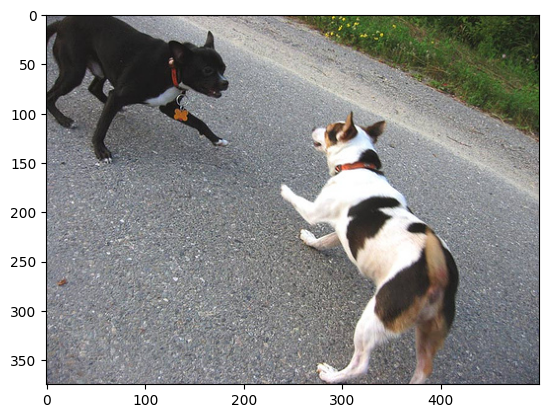

In [ ]:
generate_caption("1001773457_577c3a7d70.jpg")

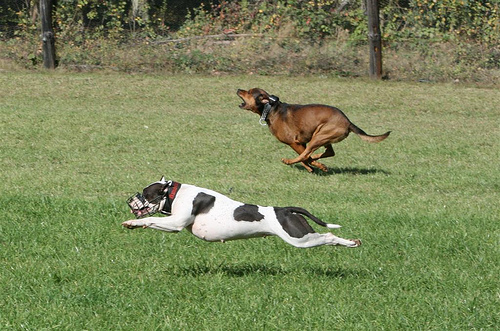

---------------------Actual---------------------
startseq black and white dog runs beside brown dog in green field endseq
startseq the black and white dog along with the brown dog are galloping outside endseq
startseq two dogs race through field endseq
startseq two dogs run across the grassy field endseq
startseq two dogs running fast in the grass endseq
--------------------Predicted--------------------
startseq two dogs running through the air endseq
Generated Caption: None


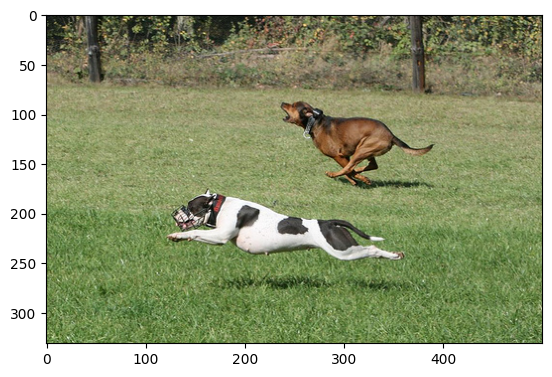

In [ ]:
import os
import random
from IPython.display import display
from PIL import Image

# Folder path containing images
image_folder = "/content/flickr8k/Images"

# Pick a random image file from the folder
random_image_file = random.choice(os.listdir(image_folder))

# Full path to the selected image
random_image_path = os.path.join(image_folder, random_image_file)

# Display the image
img = Image.open(random_image_path)
display(img)

# Generate caption
caption = generate_caption(random_image_file)
print("Generated Caption:", caption)


In [ ]:
# Install opendatasets if not already installed
!pip install opendatasets